# Análise da Insuficiência Real Aguda (IRA) em pacientes internados pelo setor de Cardiologia do HU-UFPI

## Informações Gerais

### Autores
| Nome              | Lattes                   | Email                      |
|-------------------|--------------------------|----------------------------|
| Gabriel Feitosa Melo Coelho | [Link](http://lattes.cnpq.br/4697851599945993) | gabrielcoelho09gc@gmail.com |
| Francisco Luciani de Miranda Vieira | [Link](http://lattes.cnpq.br/4627829411266800) | email_mockup@gmail.com |

In [2]:
# TODO: PREENCHER EMAIL HU-UFPI DO LUCIANI

### Versionamento 
- **Data de atualização:** 27/02/2024
- **Versão do notebook:** 2.5

### Nota
O Python, principal ferramenta desta análise, é uma linguagem de programação de alto nível que abstrai comandos para uma sintaxe próxima da língua natural inglesa. Em virtude deste fato, a fim de manter a consistência, a explicação da análise ocorrerá em portugues enquanto o código permanecerá completamente em inglês. 

Além disso, uma vez que um determinado comando em python for explicado o mesmo não será explicado novamente em ocorrências futuras.

### Origem dos Dados
Os dados utilizadas nesta análise são de origem primária, provenientes de pacientes internados pelo setor de cardiologia do Hospital Universitário da Universidade Federal do Piauí (HU-UFPI), foram extraídos do banco de dados do sistema interno AGHU por meio de consultas SQL -realizadas pelo setor de inovação do HU-UFPI-, anonimizados e por fim exportados no formato 'csv'.  

As consultas SQL utilizadas encontram-se na pasta "queries" deste projeto. Estas consultas agregam informações de diversas tabelas do banco de dados em duas tabelas finais, cada qual com seu respectivo contexto.

**Tabelas fornecidas:**
1. Tabela de Controle dos Pacientes
2. Tabela de Creatinina  

**Universo:** Internação da cardiologia do HU-UFPI  
**Período de análise:** 2018 a 2022  
**Granularidade:** Data e hora de eventos (exame ou aferição)

In [3]:
# TODO: ATUALIZAR QUERIES

## Termos e Consentimento
**Nº do parecer de aprovação junto ao CEP:** 6.082.658  

Esta análise foi desenvolvida como parte do projeto "Utilização de Machine Learning como Método de Análise para Predição da Injúria Renal Aguda de Pacientes de Pós-operatório de cirurgia Cardíaca do HU-UFPI", encabeçada pela residente Antonia Marcia Sousa Cardoso, sob orientação do prof. Dr. Ginivaldo Victor Ribeiro do Nascimento. Os dados utilizados são de origem do Hospital Universitário da UFPI e foram cedidos para o desenvolvimento desta análise.

## 1. Descrição da Análise

### 1.1. Introdução

O Hospital Universitário da Universidade Federal do Piauí (HU-UFPI) é um hospital público, de ensino, vinculado à Empresa Brasileira de Serviços Hospitalares (EBSERH), com atendimento de média e alta complexidade, que atende a população do estado do Piauí e estados vizinhos. Possuindo 240 leitos, sendo 30 de UTI, e 10 salas de cirurgia, sendo um hospital de referência em diversos aspectos. 

Sob a ótica da modernização da gestão hospitalar, o HU-UFPI fomenta soluções que possam otimizar o gerenciamento de casos e a tomada de decisão inteligente. Nessa perspectiva, a análise de dados hospitalares é uma ferramenta valiosa, uma vez que, quando dados hospitalares são consistentes os insights que podem ser extraídos transbordam riqueza, como: identificação de padrões de comportamento, a identificação de fatores de risco, a identificação de padrões de evolução de doenças, a identificação de padrões de resposta a tratamentos, entre outros. Dessa forma, podem contribuir para a melhoria da qualidade do atendimento, assistência ao paciente e otimizar o gerenciamento de casos.

No contexto da internação da cardiologia do HU-UFPI a Insuficiência Renal Aguda (IRA) emerge como uma preocupação significativa. A IRA pode ser um desafio adicional para a recuperação de pacientes cardíacos em pós-operatório, portanto sua prevenção torna-se fundamental para assegurar uma abordagem segura no tratamento. Entre os fatores de risco para a IRA destaca-se a Creatinina, importante indicador da função renal, desempenhando um papel crítico na avaliação da saúde renal dos pacientes. De forma prática, atualmente a IRA pode ser definida como a elevação de 30% da creatinina basal em 48h.

In [759]:
# TODO: IMAGEM PARA ILUSTRAR A IRA

### 1.2. Problemática

Frente ao paradigma apresentado, as problemáticas que norteiam a presente análise são:

* **Quais padrões podem ser identificados em pacientes internados no setor de cardiologia do HU-UFPI ?**

* **Com os dados disponíveis pelo monitoramento dos pacientes internados no setor de cardiologia do HU-UFPI, qual performance da predição por modelos simples de Machine Learning para a ocorrência de IRA ? Esta performance é aceitável para a implementação de um modelo no hospital ?**

### 1.3. Objetivos

Considerando o exposto, esta análise tem como objetivos:

- Rotular a ocorrência de IRA nos pacientes internados no setor de cardiologia do HU-UFPI.
- Realizar uma análise exploratória dos dados de controle e dos níveis de creatinina dos pacientes.
- Identificar tendências e padrões.
- Desenvolver modelos de machine learning para prever a ocorrência de Insuficiência Renal Aguda com base em variáveis selecionadas durante a análise.

## 2. Preparação do Ambiente

Para conduzir a análise de dados e implementar modelos de machine learning, é essencial a configuração adequada do ambiente de trabalho virtual. Abaixo seguem as principais tecnologias e a linguagem utilizada.

- **Linguagem de programação:** Python
- **Ambiente de desenvolvimento:** Jupyter Notebook
- **Bibliotecas principais:** Pandas, NumPy, Matplotlib, Plotly, Scikit-learn, TensorFlow, Keras
- **Gestão de ambiente virtual:** Miniconda  _(opcional)_

### 2.1. Instalação de dependências

Até o presente momento, as instruções para esta etapa encontram-se no README deste projeto. 

Para replicar esta análise, antes de prosseguir certifique-se de que o ambiente virtual com as dependencias instaladas está ativado.

### 2.2. Definição de variáveis de ambiente

Esta seção contem celulas de código para definição de variáveis de ambiente responsaveis por apontar o endereço dos arquivos de tabelas utilizadas e controlar o comportamento deste notebook.

In [760]:
# Variaveis de caminho das pastas do projeto
DATA_PATH = '../data/' # <--- !! ALTERE AQUI !! caso mude o esquema de diretorios de dados
RAW_PATH = DATA_PATH + 'raw/' # <--- !! ALTERE AQUI !! caso mude o diretorio de dados brutos
PROCESSED_PATH = DATA_PATH + 'processed/' # <--- !! ALTERE AQUI !! caso mude o diretorio de dados processados
FINAL_PATH = DATA_PATH + 'final/' # <--- !! ALTERE AQUI !! caso mude o diretorio de dados finais
MODEL_PATH = '../models/' # <--- !! ALTERE AQUI !! caso mude o diretorio de modelos

In [761]:
# Variaveis de caminho dos arquivos de dados
CONTROL_CSV = RAW_PATH + 'Dados_Controles_2018-2023-05-cardiologia.csv' # <--- !! ALTERE AQUI !! caso o dataset de CONTROLE esteja com outro nome
CREATININE_CSV = RAW_PATH + 'Dados_CRE_2018-2023-05-internados_em20240105.csv' # <--- !! ALTERE AQUI !! caso o dataset CREATININA esteja com outro nome

In [762]:
# Configuração de recarregamento de funções em cache
%load_ext autoreload
%autoreload 2
# Dessa forma, as funções são recarregadas sempre que o arquivo for salvo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2.3. Importação de bibliotecas e funções

Esta seção contem as celulas de código para importação das bibliotecas e funções necessarias das dependencias instaladas, assim como, o proposito geral de aplicação das mesmas.

In [763]:
from icecream import ic # Biblioteca util para debugar codigo

In [764]:
import pandas as pd # Biblioteca para manipulacao de dados
import numpy as np # Biblioteca para manipulacao de dados

In [765]:
from scipy.stats import randint

In [766]:
import matplotlib.pyplot as plt # Biblioteca base para plotagem de graficos
import plotly.express as px # Biblioteca para plotagem de graficos
import seaborn as sns # Biblioteca para plotagem de graficos

In [767]:
from sklearn.preprocessing import MinMaxScaler # Biblioteca para normalizacao de dados
from sklearn.model_selection import train_test_split # Biblioteca para separar os dados em treino e teste
from sklearn.utils import shuffle # Biblioteca para embaralhar os dados

In [768]:
from lazypredict.Supervised import LazyRegressor  # Biblioteca para testar varios modelos de regressao de forma rapida e pratica
from lazypredict.Supervised import LazyClassifier # Biblioteca para testar varios modelos de classificacao de forma rapida e pratica

In [769]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor
import lightgbm as lgb

In [770]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [771]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, classification_report

In [772]:
import tensorflow as tf # Biblioteca base para criacao de modelos de Deep Learning
import keras as k # Framework para criacao de modelos de Deep Learning

### 2.4. Funções auxiliares

A fim de evitar a poluição visual e prezar pela compreenção geral dos procedimentos, as funções, blocos de código reutilizaveis, criadas para esta análise estão definidas e documentadas dentro de arquivos .py na pasta "funtions" deste projeto, sendo apenas importadas nesta seção. 

As mesmas estão agrupadas por sua utilidade como: facilitar a manipulação dos dados, visualização de gráficos, criação de modelos de aprendizado de máquina.

In [773]:
# Funções para manipulações gerais de dados dos datasets
from functions.general import (
    parse_datetime,
    split_datetime,
    create_uid,
    keep_only_valid_records,
    time_diff_collection_and_hospitalization,
    time_diff_between_collections,
    value_variation_between_collections,
    drop_variation_and_diff_null_values,
)

In [774]:
# Funções para manipulações de dados do dataset de creatinina
from functions.creatinine import (
    calculate_age,
    identify_hospitalization_time,
    identify_collection_time,
    identify_ira,
    label_target,
)

In [775]:
# Funções para manipulações de dados do dataset de controle
from functions.control import (
    fill_collection_of_type_elimination,
    drop_null_values_that_are_not_type_elimination,
    keep_only_selected_types,
    pivot,
)

In [776]:
# Funções para manipulações de dados do dataset final
from functions.final import (
    merge_cre_contr
)


## 3. Preparação dos Dados

As informações fornecidas nos arquivos '.csv' exportados pelas consultas no sistema AGHU são brutas e misturam dados provenientes de origem humana direta, quanto provenientes de forma indireta por automações de sistemas de registros. Sobre a primeira forma, é importante ressaltar como dados de origem humana ou que dependem da mesma, estão propensos a falhas de diversas naturezas mesmo não sendo, em sua maioria, mal intencionadas ou propositais. Além disso, muitas vezes os dados brutos podem ser enriquecidos naturalmente com a criação de informações adicionais provenientes de insights do proprio conjunto de dados e esse enriquecimento é diferencial para modelos de aprendizado de maquina eficientes.

Assim, é necessaria a manipulação destes datasets para adequação a um formato de dados mais ideal ao desenvolvimento da análise e limpeza de possiveis inconsistencias.

Inicialmente os datasets de exames de creatinina e aferições de informações de controle serão manipulados individualmente. Para em seguida, ocorrer a criação e manipulação de um dataset final com a combinação de features e registros selecionados dos dois dataset anteriores.

### 3.1. Base de dados de creatinina

**#1 Descrição conceitual da base de dados:**

Conjunto de informações de eventos de exames do indicador creatinina para cada prontuario (que representa um paciente unico). Dessa forma, um paciente pode ter mais de um evento de creatinina, e cada evento de creatinina pode ter um resultado diferente. Vale a atenção que cada prontuario pode possuir uma ou mais internações.

Este é o dataset principal, uma vez que, nossas features alvo para predição por machine learning provem deste. Durante o processo de manipulação do dataset será feita a rotulação das features quando possivel.

| Feature | Descrição | Formato | Observação |
|---------|-----------|---------|------|
| prontuario | ID de identificação do paciente | Integer | |
| dt_nascimento | Data de nascimento do paciente | Datetime | |
| datainternacao | Data de internação do paciente | Datetime | |
| dthr_programada | Data do programada para ocorrencia do exame de creatinina | Datetime | |
| resultado | Resultado do exame de creatinina em mg/dL | Float | |

**Visualização geral do estado atual do dataset**

In [777]:
df_creatinine = pd.read_csv(CREATININE_CSV, sep=',', encoding='utf-8') # Carrega o dataset de creatinina na memoria
df_creatinine.info() # Mostra informações do dataset 
df_creatinine.head() # Mostra as 5 primeiras linhas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121034 entries, 0 to 121033
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   prontuario       121034 non-null  int64  
 1   dt_nascimento    121034 non-null  object 
 2   datainternacao   121034 non-null  object 
 3   dthr_programada  121034 non-null  object 
 4   resultado        120987 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


,prontuario,dt_nascimento,datainternacao,dthr_programada,resultado
0,4543690,1953-02-11 00:00:00,2018-10-17 01:32:00,2018-11-05 23:47:00,0.98
1,5055561,1963-10-14 00:00:00,2020-04-10 15:32:00,2020-05-03 09:58:00,0.95
2,5056189,1942-05-01 00:00:00,2020-04-22 16:38:00,2020-04-22 23:31:00,1.14
3,4433074,1968-07-12 00:00:00,2018-06-28 20:06:00,2018-06-30 12:06:00,0.52
4,5192885,1974-05-26 00:00:00,2021-06-05 21:58:00,2021-06-05 22:13:00,1.12


In [778]:
df_creatinine.isnull().sum() # Mostra a quantidade de valores nulos em cada coluna do dataset

prontuario          0
dt_nascimento       0
datainternacao      0
dthr_programada     0
resultado          47
dtype: int64

É perceptivel que a base já contem originalmente 47 dados nulos para a coluna 'resultado' que representa a feature de valor do exame de creatinina. Estes serão eliminados devido invalidade.

In [779]:
df_creatinine.describe(include='all') # Mostra informações estatisticas do dataset

,prontuario,dt_nascimento,datainternacao,dthr_programada,resultado
count,121034.00,121034,121034,121034,120987.00
unique,NaN,11158,18482,112295,NaN
top,NaN,1978-12-24 00:00:00,2018-03-18 22:23:00,2022-09-18 06:00:00,NaN
freq,NaN,262,252,19,NaN
mean,4652179.19,NaN,NaN,NaN,-26623.08
std,843881.47,NaN,NaN,NaN,2673261.27
min,455.00,NaN,NaN,NaN,-268435456.00
25%,4342234.00,NaN,NaN,NaN,0.69
50%,4868949.00,NaN,NaN,NaN,0.96
75%,5185764.00,NaN,NaN,NaN,1.52


Além disso, nota-se que essa mesma feature possui intervalo inter quartil (IQR) coerente, porem seus valores maximos e minimos contem anomalias (outliers) extremamente discrepantes.

Inclusive, o valor minimo é especialmente preocupante devido sua grandeza e valor negativo. Valores negativos podem indicar erros na coleta ou no processamento da amostra, falhas no equipamento de laboratório ou outras questões técnicas. 

Estes valores tambem serão eliminados para assegurar a eficiencia dos modelos treinados.

In [780]:
# TODO: É interessante verificar qual a origem desta discrepancia

**Dicionario de manipulações**

A seguir está a criação de um dicionario em python que reune em um só lugar as etapas de manipulação deste dataset e seus respectivos argumentos. Lembrando que para maiores informações do procedimento interno de cada função auxiliar aplicada, basta verificar na pasta "functions" deste projeto.

In [781]:
creatinine_args = { # Dicionário de argumentos para o tratamento e enriquecimento do dataset de creatinina

    # Features a serem removidas do dataset
    'to_drop': [], 

    # Features a serem renomeadas, visando facilitar a manipulação dos dados e interpretação
    'to_rename': {
        'datainternacao': 'dt_internacao',
        'dthr_programada': 'dt_creatinina',
        'resultado': 'valor_creatinina',
    },

    # Features a serem convertidas para o tipo de dado especificado
    'to_parse': {
        'to_datetime': {
            'function': parse_datetime, # Função para conversão para datetime personalizada
            'columns':[
                'dt_nascimento',
                'dt_internacao',
                'dt_creatinina',
            ],
            'args': {
                'column': 'dt_nascimento',
                'column':'dt_internacao',
                'column':'dt_creatinina',
            }
        },
        'to_string': {
            'function': pd.DataFrame.astype, # Função para conversão para string
            'columns':[
                'prontuario'
            ],
            'args': {
                'dtype': 'str'
            }
        },
    },

    'to_eliminate': { # Eliminação de registros que não atendem as regras de validação
        'valid_hospitalization_start': { # Eliminação de registros cuja data de internação é menor que 01/01/2018
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_internacao',
                'operation': '>=',
                'second': '2018-01-01',
                'second_is_constant': True,
            },
        },
        'valid_hospitalization_start': { # Eliminação de registros cuja data de internação é menor que 01/01/2018
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_internacao',
                'operation': '>=',
                'second': '2018-01-01',
                'second_is_constant': True,
            },
        },
        'valid_records_of_hospitalization': { # Eliminação de registros cuja data de internação é maior que a data de coleta de creatinina
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_creatinina',
                'operation': '>=',
                'second': 'dt_internacao',
            },
        },
        'valid_value_of_creatinine': { # Eliminação de registros cujo valor de creatinina 
            'function': keep_only_valid_records,
            'args': {
                'first': 'valor_creatinina',
                'operation': '>=',
                'second': 0,
                'second_is_constant': True,
            },
        },
        'valid_value_of_non_urine_creatinine': { # Eliminação de registros cujo valor de creatinina
            'function': keep_only_valid_records,
            'args': {
                'first': 'valor_creatinina',
                'operation': '<=',
                'second': 5,
                'second_is_constant': True,
            },
        },
    },

    # Preenchimento de valores nulos
    'to_fill': {},
    
    # Features a serem criadas a partir de features já existentes para enriquecer o dataset
    'to_feature_enginner': {
        'split_datetime': { # Extrai data da coluna de data e hora 
            'function': split_datetime,
            'args': {},
            'to_drop': ['dt_nascimento_date'],
        },
        'create_uid': { # Criação de um identificador único para cada prontuário e data de internação
            'function': create_uid,
            'args':{},
            'to_drop': ['dt_internacao_date'],
        },
        'calculate_age': { # Criação de uma feature para a idade do paciente em anos
            'function': calculate_age,
            'args': {},
            'to_drop': ['dt_nascimento'],
        },
        'identify_hospitalization_time': { # Criação de uma feature para contar o número da internação de cada paciente
            'function': identify_hospitalization_time,
            'args': {},
            'to_drop': [],
        },
        'time_diff_creatinine_collection_and_hospitalization': { # Criação de uma feature para calcular o tempo entre a data de internação e a data da coleta de creatinina
            'function': time_diff_collection_and_hospitalization,
            'args': {
                'dt_collection': 'dt_creatinina',
            },
            'to_drop': [],
        },
        'time_diff_between_creatinine_collections': { # Criação de uma feature para calcular o tempo entre a data da coleta de creatinina atual e a anterior
            'function': time_diff_between_collections,
            'args': {
                'dt_collection': 'dt_creatinina',
            },
            'to_drop': [],
        },
        'identify_creatinine_collection_time': { # Criação de uma feature para contar o número de coleta de creatinina de cada paciente
            'function': identify_collection_time,
            'args': {},
            'to_drop': [],
        },
        'value_variation_between_creatinine_collections': { # Criação de uma feature para calcular a variação da creatinina entre a coleta atual e a anterior E a variação da creatinina entre a coleta atual e a coleta anterior a anterior            
            'function': value_variation_between_collections,
            'args': {
                'collection': 'valor_creatinina',
                'dt_collection': 'dt_creatinina',
            },
            'to_drop': [],
        },
        'identify_ira': { # Criação de uma feature para identificar ocorrencia da IRA de acordo com as regras de validação 
            'function': identify_ira,
            'args':{},
            'to_drop': [],
        },
        'label_creatinine_target': { # Criação de uma feature alvo para rotular a creatinina da próxima coleta de cada evento, caso existente
            'function': label_target,
            'args': {
                'target': 'valor_creatinina',
            },
            'to_drop': [],
        },
        'label_ira_target': { # Criação de uma feature alvo para rotular a IRA da próxima coleta de cada evento, caso existente
            'function': label_target,
            'args': {
                'target': 'ira',
            },
            'to_drop': [],
        }
    },

    # Serie de transformações finais do dataset para o formato desejado
    'to_transform': {},
    
}

**#2 Limpeza**

Ao inicio de cada etapa de manipulação de dados desta análise será feito uma copia do conjunto de dados subsequente para facilitar o desenvolvimento e validação.

In [782]:
df_creatinine_clean = df_creatinine.copy() # Cria uma copia do dataset de creatinina para ser manipulado sem alterar o subsequente

**Eliminação inicial de features:** Eliminação de colunas (features) que não serão utilizadas na análise, ou que possuem informações irrelevantes ou redundante, se possivel ou necessario.

In [783]:
#df_creatinine_clean = df_creatinine_clean.drop(columns=creatinine_args['to_drop']) # Remove as colunas do dataset

Neste caso, não houve necessidade de eliminação inicial, em virtude da constante evolução desta análise algumas destas eliminação de features irrelevantes foram alteradas diretamente nas queries de consulta SQL.

**Renomeação de features:** Renomeação de colunas para facilitar a manipulação dos dados e a interpretação.

In [784]:
df_creatinine_clean = df_creatinine_clean.rename(columns=creatinine_args['to_rename']) # Renomeia as colunas do dataset

**Parsing de dados:** Conversão de dados para o formato adequado.

In [785]:
for parse_type in creatinine_args['to_parse']: # Itera sobre os tipos de conversão de dados
    try:
        for column in creatinine_args['to_parse'][parse_type]['columns']: # Itera sobre as colunas a serem convertidas
            df_creatinine_clean[column] = creatinine_args['to_parse'][parse_type]['function'](df_creatinine_clean[column], **creatinine_args['to_parse'][parse_type]['args']) # Converte os dados da coluna para o tipo especificado
        print(f'-> {parse_type}: OK') # Mostra o tipo de conversão de dados
    except Exception as e:
        print(f'-> {parse_type}: ! FAIL !')
        print(f'[{parse_type}] {e}')

-> to_datetime: OK
-> to_string: OK


**Eliminação de registros:** Eliminação de registros invalidos ou outliers. Neste caso, iremos eliminar todos os registros de cada paciente com internação unica que teve algum registro invalido, uma vez que não podemos asseguar a qualidade dos registros de eventos daquele paciente, mesmo quando todos não são invalidos.

Eliminamos invalidos por internação previa ou posterior ao recorte de tempo deste projeto: 2018-2022, assim como tambem, invalidos por internação posterior ao inicio do registro de eventos, e por fim, invalidos por niveis creatinina negativos. 

In [786]:
for elimination in creatinine_args['to_eliminate']: # Itera sobre os tipos de eliminação de dados
    try:
        len_before = len(df_creatinine_clean) # Armazena o tamanho do dataset antes da eliminação
        df_creatinine_clean = creatinine_args['to_eliminate'][elimination]['function'](df_creatinine_clean, **creatinine_args['to_eliminate'][elimination]['args']) # Elimina os dados de acordo com a regra de validação especificada
        len_after = len(df_creatinine_clean) # Armazena o tamanho do dataset depois da eliminação
        print(f'-> {elimination}: OK') # Mostra o tipo de eliminação de dados
        print(f'[{elimination}] {len_before - len_after} records eliminated') # Mostra a quantidade de registros eliminados
    except Exception as e:
        print(f'-> {elimination}: ! FAIL !')
        print(f'[{elimination}] {e}')

--Before--
[count_unique_uids] unique uid: 18525
[count_unique_uids] unique patients: 15099
--after--
[count_unique_uids] unique uid: 18447
[count_unique_uids] unique patients: 15044
-> valid_hospitalization_start: OK
[valid_hospitalization_start] 597 records eliminated
--Before--
[count_unique_uids] unique uid: 18447
[count_unique_uids] unique patients: 15044
--after--
[count_unique_uids] unique uid: 18445
[count_unique_uids] unique patients: 15042
-> valid_records_of_hospitalization: OK
[valid_records_of_hospitalization] 2 records eliminated
--Before--
[count_unique_uids] unique uid: 18445
[count_unique_uids] unique patients: 15042
--after--
[count_unique_uids] unique uid: 18387
[count_unique_uids] unique patients: 14994
-> valid_value_of_creatinine: OK
[valid_value_of_creatinine] 1193 records eliminated
--Before--
[count_unique_uids] unique uid: 18387
[count_unique_uids] unique patients: 14994
--after--
[count_unique_uids] unique uid: 17609
[count_unique_uids] unique patients: 14374

**Preenchimento de dados:** Preenchimento de dados faltantes conforme regras estabelecidas, se possivel ou necessario.

In [787]:
#for fill in creatinine_args['to_fill']: # Itera sobre os tipos de preenchimento de dados
#    try:
#        df_creatinine_clean = creatinine_args['to_fill'][fill]['function'](df_creatinine_clean, **creatinine_args['to_fill'][fill]['args']) # Preenche os dados de acordo com a regra de preenchimento especificada
#        print(f'-> {fill}: OK') # Mostra o tipo de preenchimento de dados
#    except Exception as e:
#        print(f'-> {fill}: ! FAIL !')
#        print(f'[{feature_name}] {e}')

Neste caso, não houve necessidade de preenchimentos.

**Visualização geral do estado atual do dataset**

In [788]:
df_creatinine_clean.info()
df_creatinine_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105607 entries, 0 to 105606
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   prontuario        105607 non-null  object        
 1   dt_nascimento     105607 non-null  datetime64[ns]
 2   dt_internacao     105607 non-null  datetime64[ns]
 3   dt_creatinina     105607 non-null  datetime64[ns]
 4   valor_creatinina  105607 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(1)
memory usage: 4.0+ MB


,prontuario,dt_nascimento,dt_internacao,dt_creatinina,valor_creatinina
0,4543690,1953-02-11,2018-10-17 01:32:00,2018-11-05 23:47:00,0.98
1,5055561,1963-10-14,2020-04-10 15:32:00,2020-05-03 09:58:00,0.95
2,5056189,1942-05-01,2020-04-22 16:38:00,2020-04-22 23:31:00,1.14
3,4433074,1968-07-12,2018-06-28 20:06:00,2018-06-30 12:06:00,0.52
4,5192885,1974-05-26,2021-06-05 21:58:00,2021-06-05 22:13:00,1.12


In [789]:
df_creatinine_clean.isnull().sum() 

prontuario          0
dt_nascimento       0
dt_internacao       0
dt_creatinina       0
valor_creatinina    0
dtype: int64

In [790]:
df_creatinine_clean.describe(include='all')

,prontuario,dt_nascimento,dt_internacao,dt_creatinina,valor_creatinina
count,105607,105607,105607,105607,105607.00
unique,14374,10785,17567,98901,NaN
top,4342341,1978-12-24 00:00:00,2018-03-18 22:23:00,2021-01-18 06:00:00,NaN
freq,252,262,252,19,NaN
first,NaN,1915-07-22 00:00:00,2018-01-01 15:54:00,2018-01-01 16:53:00,NaN
last,NaN,2005-01-08 00:00:00,2023-05-30 20:49:00,2023-05-31 07:10:00,NaN
mean,NaN,NaN,NaN,NaN,1.11
std,NaN,NaN,NaN,NaN,0.70
min,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,0.67


Os beneficios da conversão de tipos já é perceptivel pela saida do metodo .describe(), uma vez que agora temos acesso a estatisticas diferentes.

**#3 Engenharia**

In [791]:
df_creatinine_enginnered = df_creatinine_clean.copy()

**Engenharia inicial de variaveis:** criação de novas variáveis a partir de variáveis existentes para enriquecer a análise, facilitar o treinamento de modelos de machine learning e a interpretação dos resultados.

Atenção! Foram preparadas features temporais que representam o historico de cada paciente de dentro de uma janela de 2 coletas.

Durante o processo de engenharia de variaveis ocorrerá a criação das variaveis alvo para os modelo preditores, momento tambem conhecido como rotulação de dados.

**Rotulação de dados:** rotulação dos dados com base em conhecimento especializado. Neste caso, a rotulação foi realizada com base na variação do resultado de creatinina entre as coletas, sendo considerado como positivo para a ocorrência de IRA quando a variação entre as coletas foi maior que 20% em uma janela de 1 coleta ou maior que 30% em uma janela de 2 coletas.

Foi adotado a metodologia de janelas de coleta, em virtude da não padronização dos intervalos de entre exames, por procedimentos internos. É considerado pelo HU-UFPI que se não ocorreu a solicitação de exame até aquele momento, que não houve alteração significativa no paciente e a Creatinina deve ser considerada igual à ultima checagem.

Em sua maioria: a janela de 1 coleta ocorre apartir de 20h desde o ultimo exame, representando 24 horas; a janela de 2 coletas ocorre a partir de 40 horas desde o penultimo exame, representando 48 horas.

In [792]:
for feature_name, feature_args in creatinine_args['to_feature_enginner'].items(): # Loop para criar as features de acordo com o dicionario de argumentos
    try:
        df_creatinine_enginnered = feature_args['function'](df_creatinine_enginnered, **feature_args['args']) # Chama a função de criação da feature com os argumentos especificados
        df_creatinine_enginnered = df_creatinine_enginnered.drop(columns=feature_args['to_drop']) # Remove determinadas colunas do dataset caso especificado
        print(f'-> {feature_name}: OK') # Mostra o nome da feature que esta sendo criada
    except Exception as e: # Caso ocorra algum erro na criação da feature, e armazena o erro na variavel e
        print(f'-> {feature_name}: ! FAIL !')
        print(f'[{feature_name}] {e}')

-> split_datetime: OK
[count_unique_uids] unique uid: 17609
[count_unique_uids] unique patients: 14374
-> create_uid: OK
-> calculate_age: OK
-> identify_hospitalization_time: OK
-> time_diff_creatinine_collection_and_hospitalization: OK
-> time_diff_between_creatinine_collections: OK
-> identify_creatinine_collection_time: OK
-> value_variation_between_creatinine_collections: OK
-> identify_ira: OK
-> label_creatinine_target: OK
-> label_ira_target: OK


**Visualização geral do estado atual do dataset**

In [793]:
df_creatinine_enginnered.info()
df_creatinine_enginnered.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105607 entries, 0 to 105606
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype          
---  ------                            --------------   -----          
 0   prontuario                        105607 non-null  object         
 1   dt_internacao                     105607 non-null  datetime64[ns] 
 2   dt_creatinina                     105607 non-null  datetime64[ns] 
 3   valor_creatinina                  105607 non-null  float64        
 4   dt_creatinina_date                105607 non-null  object         
 5   uid_prontuario_dt_internacao      105607 non-null  object         
 6   idade                             105607 non-null  int64          
 7   n_internacoes                     105607 non-null  int64          
 8   diff_dt_creatinina_dt_internacao  105607 non-null  timedelta64[ns]
 9   diff_entre_dt_creatinina_1        87998 non-null   timedelta64[ns]
 10  diff_entre_dt_creati

,prontuario,dt_internacao,dt_creatinina,valor_creatinina,dt_creatinina_date,uid_prontuario_dt_internacao,idade,n_internacoes,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,varicao_valor_creatinina_1,varicao_valor_creatinina_2,ira_1,ira,apresentara_valor_creatinina,apresentara_ira
0,10587,2021-03-20 12:12:00,2021-03-20 12:49:00,3.73,2021-03-20,10587_2021-03-20 12:12:00,84,1,0 days 00:37:00,NaT,NaT,1,NaN,NaN,0,0,NaN,NaN
1,10702,2022-11-07 05:38:00,2022-11-07 08:17:00,0.74,2022-11-07,10702_2022-11-07 05:38:00,50,1,0 days 02:39:00,NaT,NaT,1,NaN,NaN,0,0,0.84,0.00
2,10702,2022-11-07 05:38:00,2022-11-08 09:56:00,0.84,2022-11-08,10702_2022-11-07 05:38:00,50,1,1 days 04:18:00,1 days 01:39:00,NaT,2,0.14,NaN,0,0,NaN,NaN
3,10975,2021-05-23 00:05:00,2021-05-23 00:09:00,2.43,2021-05-23,10975_2021-05-23 00:05:00,85,1,0 days 00:04:00,NaT,NaT,1,NaN,NaN,0,0,0.98,1.00
4,10975,2021-05-23 00:05:00,2021-05-26 11:24:00,0.98,2021-05-26,10975_2021-05-23 00:05:00,85,1,3 days 11:19:00,3 days 11:15:00,NaT,2,-0.60,NaN,1,1,1.04,0.00


A partir do enriquecimento de dados, apenas com insights sobre o conjunto foi possivel expandir a coleção de features de 5 para 18.

In [794]:
df_creatinine_enginnered.isnull().sum()

prontuario                              0
dt_internacao                           0
dt_creatinina                           0
valor_creatinina                        0
dt_creatinina_date                      0
uid_prontuario_dt_internacao            0
idade                                   0
n_internacoes                           0
diff_dt_creatinina_dt_internacao        0
diff_entre_dt_creatinina_1          17609
diff_entre_dt_creatinina_2          29596
n_coletas_creatinina                    0
varicao_valor_creatinina_1          17609
varicao_valor_creatinina_2          29596
ira_1                                   0
ira                                     0
apresentara_valor_creatinina        17609
apresentara_ira                     17609
dtype: int64

As features que se baseiam na tecnica de janelas temporais, fazem uso de eventos previos ou subsequentes, que nem sempre estão disponiveis, portanto é natural a presença de dados nulos caso.

In [795]:
df_creatinine_enginnered.describe(include='all')

,prontuario,dt_internacao,dt_creatinina,valor_creatinina,dt_creatinina_date,uid_prontuario_dt_internacao,idade,n_internacoes,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,varicao_valor_creatinina_1,varicao_valor_creatinina_2,ira_1,ira,apresentara_valor_creatinina,apresentara_ira
count,105607,105607,105607,105607.00,105607,105607,105607.00,105607.00,105607,87998,76011,105607.00,87998.00,76011.00,105607.00,105607.00,87998.00,87998.00
unique,14374,17567,98901,NaN,1977,17609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4342341,2018-03-18 22:23:00,2021-01-18 06:00:00,NaN,2021-02-09,4342341_2018-03-18 22:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,252,252,19,NaN,89,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2018-01-01 15:54:00,2018-01-01 16:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-05-30 20:49:00,2023-05-31 07:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.11,NaN,NaN,57.27,1.00,16 days 02:12:48.387663696,2 days 06:19:06.323018705,4 days 06:36:25.994948099,9.44,159.12,407.88,0.05,0.05,1.12,0.06
std,NaN,NaN,NaN,0.70,NaN,NaN,17.29,0.00,22 days 17:07:44.225739274,2 days 03:24:38.547593426,3 days 06:05:06.792344148,13.30,47194.53,112440.68,0.23,0.23,0.72,0.25
min,NaN,NaN,NaN,0.00,NaN,NaN,18.00,1.00,0 days 00:01:00,0 days 00:00:00,0 days 00:00:00,1.00,-1.00,-1.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,NaN,0.67,NaN,NaN,45.00,1.00,2 days 17:48:00,1 days 00:00:00,2 days 00:46:00,2.00,-0.11,-0.14,0.00,0.00,0.66,0.00


**#4 Transformação**

In [796]:
df_creatinine_transformed = df_creatinine_enginnered.copy()

In [797]:
#for transformation in creatinine_args['to_transform']: # Itera sobre os tipos de transformação de dados
#    try:
#        df_creatinine_transformed = creatinine_args['to_transform'][transformation]['function'](df_creatinine_transformed, **creatinine_args['to_transform'][transformation]['args']) # Transforma os dados de acordo com a regra especificada
#        print(f'-> {transformation}: OK') # Mostra o tipo de transformação de dados
#    except Exception as e:
#        print(f'-> {transformation}: ! FAIL !')
#        print(f'[{transformation}] {e}')

O formato desde dataset ja está ideal para analise e desenvolvimento, portanto esta etapa não precisa ser realizada.

**#5 Exportação**

Concluida a manipulação do dataset de creatinina, este será salvo na pasta "processed" deste projeto.

In [798]:
df_creatinine_final = df_creatinine_transformed.copy()

In [799]:
df_creatinine_final.to_csv(f'{PROCESSED_PATH}creatinina_processado.csv', sep=',', encoding='utf-8', index=False)

### 3.2. Base de dados de controle

**#1 Descrição conceitual da Base de Dados:**

Conjunto de informações de eventos de aferições de diversos indicadores de controle, categorizados por grupo e subgrupo, para cada prontuario (que representa um paciente unico). Dessa forma, um paciente pode ter mais de evento cada uma com um tipo de indicador. Vale a atenção que cada prontuario pode possuir uma ou mais internações.

Este é um dataset auxiliar para possivelmente complementar e enriquecer com features o dataset principal de creatinina. Durante o processo de manipulação do dataset será feita a transformação de um dataset vertical para um formato horizontal, com as informações aqui contidas expandidas em colunas proprias, em vez de agrupadas.

| Feature | Descrição | Formato | Nota |
|---------|-----------|---------|------|
| prontuario | ID de identificação do paciente | Integer | |
| dthr_internacao | Data de internação do paciente | Datetime | |
| grupo_controle | Classificação da leitura de controle do paciente | String | |
| tipo_controle | Tipo (sub-classificação) de controle do paciente | String | |
| data_hora | Data e hora da leitura de controle do paciente | Datetime | |
| medida | Valor da leitura de controle do paciente | Float | |
| alta | Indicador do tipo de alta do paciente | String | |

In [800]:
df_control = pd.read_csv(CONTROL_CSV, sep=',', encoding='utf-8')
df_control.info()
df_control.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424990 entries, 0 to 424989
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   prontuario       424990 non-null  int64  
 1   dthr_internacao  424990 non-null  object 
 2   grupo_controle   424990 non-null  object 
 3   tipo_controle    424990 non-null  object 
 4   data_hora        424990 non-null  object 
 5   medida           424949 non-null  float64
 6   alta             424990 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.7+ MB


,prontuario,dthr_internacao,grupo_controle,tipo_controle,data_hora,medida,alta
0,4117222,2018-11-07 17:11:00,Sinais Vitais,Pressão Arterial Sistólica,2018-11-07 22:00:00,130.00,PERMANENCIA
1,4117222,2018-11-07 17:11:00,Sinais Vitais,Pressão Arterial Diastólica,2018-11-07 22:00:00,90.00,PERMANENCIA
2,4117222,2018-11-07 17:11:00,Sinais Vitais,Frequência Cardíaca,2018-11-07 22:00:00,78.00,PERMANENCIA
3,4117222,2018-11-07 17:11:00,Sinais Vitais,Frequência Respiratória,2018-11-07 22:00:00,17.00,PERMANENCIA
4,4117222,2018-11-07 17:11:00,Sinais Vitais,Temperatura Axilar,2018-11-07 22:00:00,36.00,PERMANENCIA


In [801]:
df_control.isnull().sum()

prontuario          0
dthr_internacao     0
grupo_controle      0
tipo_controle       0
data_hora           0
medida             41
alta                0
dtype: int64

Devido a não padronização no procedimento de registro dos dados, alguns tipos de indicadores de controle não possuem valor, mas nestes casos o registro do evento em si é mais importante do que algum tipo de medição. Por este motivo durante a fase de preenchimento de dado faltantes será assumido para estes indicadores o valor simbolico bolleano 1.

In [802]:
df_control.describe(include='all')

,prontuario,dthr_internacao,grupo_controle,tipo_controle,data_hora,medida,alta
count,424990.00,424990,424990,424990,424990,424949.00,424990
unique,NaN,683,4,14,53604,NaN,8
top,NaN,2018-09-19 06:54:00,Sinais Vitais,Pressão Arterial Sistólica,2018-03-06 22:00:00,NaN,PERMANENCIA
freq,NaN,4752,379202,79676,74,NaN,292791
mean,4669033.71,NaN,NaN,NaN,NaN,98.83,NaN
std,762010.58,NaN,NaN,NaN,NaN,1532.24,NaN
min,36855.00,NaN,NaN,NaN,NaN,0.00,NaN
25%,4234266.00,NaN,NaN,NaN,NaN,36.00,NaN
50%,4806816.00,NaN,NaN,NaN,NaN,68.00,NaN
75%,5297619.00,NaN,NaN,NaN,NaN,94.00,NaN


Embora a feature medida reuna indicadores de diversas naturezas e grandezas, o valor maximo apresentado é um forte outlier e deve ser revisto.

**Dicionario de manipulações**

A seguir está a criação de outro dicionario em python que reune em um só lugar as etapas de manipulação deste dataset e seus respectivos argumentos. Lembrando que para maiores informações do procedimento interno de cada função auxiliar aplicada, basta verificar na pasta "functions" deste projeto.

In [803]:
control_args = { # Dicionário de argumentos para o tratamento e enriquecimento do dataset de controle
    
    # Features a serem descartadas desde o início
    'to_drop': [],

    # Features a serem renomeadas, visando facilitar a manipulação dos dados e interpretação
    'to_rename': {
        'dthr_internacao': 'dt_internacao',
        'tipo_controle': 'tipo_controle',
        'data_hora': 'dt_controle',
        'medida': 'valor_controle',
    },

    # Features a serem convertidas para o tipo de dado especificado
    'to_parse': {
        'to_datetime': {
            'function': parse_datetime, # Função para conversão para datetime personalizada
            'columns':[
                'dt_internacao',
                'dt_controle',
            ],
            'args': {
                'column': 'dt_internacao',
                'column':'dt_controle',
            }
        },
        'to_string': {
            'function': pd.DataFrame.astype, # Função para conversão para string
            'columns':[
                'prontuario'
            ],
            'args': {
                'dtype': 'str'
            }
        },
    },

    'to_eliminate':{
        'valid_hospitalization_start': { # Eliminação de registros cuja data de internação é menor que 01/01/2018
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_internacao',
                'operation': '>=',
                'second': '2018-01-01',
                'second_is_constant': True,
            },
        },
        'valid_hospitalization_end': { # Eliminação de registros cuja data de internação é menor que 01/01/2018
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_internacao',
                'operation': '<=',
                'second': '2023-01-01',
                'second_is_constant': True,
            },
        },
        'valid_records_of_hospitalization': { # Eliminação de registros cuja data de internação é maior que a data de coleta de controle
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_controle',
                'operation': '>=',
                'second': 'dt_internacao',
            },
        },
        'null_control_value_that_is_not_elimination': { # Eliminação de registros cujo valor de controle é nulo e o tipo de controle não é 'Eliminação'
            'function': drop_null_values_that_are_not_type_elimination,
            'args': {},
        },
    },

    # Regras para preenchimento de dados faltantes
    'to_fill': {
        'of_type_elimination': { # Preenchimento de dados faltantes para a classe de controle 'Eliminação' em que o valor do controle
            'function': fill_collection_of_type_elimination,
            'args': {},
        }
    },

    # Features a serem criadas a partir de features já existentes para enriquecer o dataset
    'to_feature_enginner': {
        'split_datetime': { # Separação da data em coluna distinta
            'function': split_datetime,
            'args': {},
            'to_drop': [],
        },
        'create_uid': { # Criação de um identificador único para cada prontuário e data de internação
            'function': create_uid,
            'args':{},
            'to_drop': ['dt_internacao_date'],
        },
        'time_diff_control_collection_and_hospitalization': { # Criação de uma feature para calcular o tempo entre a data de internação e a data da coleta de controle
            'function': time_diff_collection_and_hospitalization,
            'args': {
                'dt_collection': 'dt_controle',
            },
            'to_drop': [],
        },
        'time_diff_between_control_collections': { # Criação de uma feature para calcular o tempo entre a data da coleta de controle atual e a anterior de mesmo tipo
            'function': time_diff_between_collections,
            'args': {
                'dt_collection': 'dt_controle',
                'group_by_tags': ['grupo_controle', 'tipo_controle']
            },
            'to_drop': [],
        },
        'value_variation_between_control_collections': { # Criação de uma feature para calcular a variação do controle entre a coleta atual e a anterior de mesmo tip
            'function': value_variation_between_collections,
            'args': {
                'collection': 'valor_controle',
                'dt_collection': 'dt_controle',
                'group_by_tags': ['grupo_controle', 'tipo_controle']
            },
            'to_drop': [],
        },
    },

    'to_transform': {
        'clean_up_types_of_control': { # Transformação de tipos de controle para facilitar a manipulação dos dados
            'function': keep_only_selected_types,
            'args': {},
            'to_drop': [],
        },
        'pivot_transformation': {
            'function': pivot,
            'args': {},
            'to_drop': [],
        },
    },
}

**#2 Limpeza**

In [804]:
df_control_clean = df_control.copy()

**Eliminação inicial de features:** Eliminação de colunas (features) que não serão utilizadas na análise, ou que possuem informações irrelevantes ou redundante, se possivel ou necessario.

In [805]:
#df_control_clean = df_control_clean.drop(columns=control_args['to_drop'])

Neste caso, não houve necessidade de eliminação inicial, uma vez que, durante a atualização do análise algumas destas eliminação de features desnecessarias foram alteradas nas queries de consulta SQL.

**Renomeação de features:** Renomeação de colunas para facilitar a manipulação dos dados e a interpretação.

In [806]:
df_control_clean = df_control_clean.rename(columns=control_args['to_rename'])

**Parsing de dados:** Conversão de dados para o formato adequado.

In [807]:
for parse_type in control_args['to_parse']:
    try:
        for column in control_args['to_parse'][parse_type]['columns']:
            df_control_clean[column] = control_args['to_parse'][parse_type]['function'](df_control_clean[column], **control_args['to_parse'][parse_type]['args'])
        print(f'-> {parse_type}: OK')
    except Exception as e:
        print(f'-> {parse_type}: ! FAIL !')
        print(f'[{parse_type}] {e}')

-> to_datetime: OK
-> to_string: OK


**Eliminação de registros:** Eliminação de registros invalidos ou outliers. Neste caso, iremos eliminar todos os registros de cada paciente com internação unica que teve algum registro invalido, uma vez que não podemos asseguar a qualidade dos registros de eventos daquele paciente, mesmo quando todos não são invalidos.

Eliminamos invalidos por internação previa ou posterior ao recorte de tempo deste projeto: 2018-2022, em seguida, invalidos por internação posterior ao inicio do registro de eventos, e por fim, valores nulos de indicadores de controle não pertencentes a categoria eliminação.

In [808]:
for elimination in control_args['to_eliminate']:
    try:
        len_before = len(df_control_clean)
        df_control_clean = control_args['to_eliminate'][elimination]['function'](df_control_clean, **control_args['to_eliminate'][elimination]['args'])
        len_after = len(df_control_clean)
        print(f'-> {elimination}: OK')
        print(f'[{elimination}] {len_before - len_after} records eliminated')
    except Exception as e:
        print(f'-> {elimination}: ! FAIL !')
        print(f'[{elimination}] {e}')

--Before--
[count_unique_uids] unique uid: 684
[count_unique_uids] unique patients: 667
--after--
[count_unique_uids] unique uid: 684
[count_unique_uids] unique patients: 667
-> valid_hospitalization_start: OK
[valid_hospitalization_start] 0 records eliminated
--Before--
[count_unique_uids] unique uid: 684
[count_unique_uids] unique patients: 667
--after--
[count_unique_uids] unique uid: 605
[count_unique_uids] unique patients: 588
-> valid_hospitalization_end: OK
[valid_hospitalization_end] 41167 records eliminated
--Before--
[count_unique_uids] unique uid: 605
[count_unique_uids] unique patients: 588
--after--
[count_unique_uids] unique uid: 514
[count_unique_uids] unique patients: 514
-> valid_records_of_hospitalization: OK
[valid_records_of_hospitalization] 97656 records eliminated
-> null_control_value_that_is_not_elimination: OK
[null_control_value_that_is_not_elimination] 17 records eliminated


**Preenchimento de dados:** Preenchimento de dados faltantes conforme regras estabelecidas, se possivel ou necessario.

In [809]:
for fill in control_args['to_fill']:
    try:
        df_control_clean = control_args['to_fill'][fill]['function'](df_control_clean, **control_args['to_fill'][fill]['args'])
        print(f'-> {fill}: OK')
    except Exception as e:
        print(f'-> {fill}: ! FAIL !')
        print(f'[{feature_name}] {e}')

-> of_type_elimination: ! FAIL !
[label_ira_target] 'int' object has no attribute 'loc'


**Visualização geral do estado atual do dataset**

In [810]:
df_control_clean.info()
df_control_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286150 entries, 0 to 286149
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   prontuario      286150 non-null  object        
 1   dt_internacao   286150 non-null  datetime64[ns]
 2   grupo_controle  286150 non-null  object        
 3   tipo_controle   286150 non-null  object        
 4   dt_controle     286150 non-null  datetime64[ns]
 5   valor_controle  286150 non-null  float64       
 6   alta            286150 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 15.3+ MB


,prontuario,dt_internacao,grupo_controle,tipo_controle,dt_controle,valor_controle,alta
0,4117222,2018-11-07 17:11:00,Sinais Vitais,Pressão Arterial Sistólica,2018-11-07 22:00:00,130.00,PERMANENCIA
1,4117222,2018-11-07 17:11:00,Sinais Vitais,Pressão Arterial Diastólica,2018-11-07 22:00:00,90.00,PERMANENCIA
2,4117222,2018-11-07 17:11:00,Sinais Vitais,Frequência Cardíaca,2018-11-07 22:00:00,78.00,PERMANENCIA
3,4117222,2018-11-07 17:11:00,Sinais Vitais,Frequência Respiratória,2018-11-07 22:00:00,17.00,PERMANENCIA
4,4117222,2018-11-07 17:11:00,Sinais Vitais,Temperatura Axilar,2018-11-07 22:00:00,36.00,PERMANENCIA


In [811]:
df_control_clean.isnull().sum()

prontuario        0
dt_internacao     0
grupo_controle    0
tipo_controle     0
dt_controle       0
valor_controle    0
alta              0
dtype: int64

In [812]:
df_control_clean.describe(include='all')

,prontuario,dt_internacao,grupo_controle,tipo_controle,dt_controle,valor_controle,alta
count,286150,286150,286150,286150,286150,286150.00,286150
unique,514,514,4,14,40268,NaN,8
top,4341483,2020-01-20 12:28:00,Sinais Vitais,Pressão Arterial Sistólica,2018-08-21 16:00:00,NaN,PERMANENCIA
freq,3906,3906,255334,53579,54,NaN,215728
first,NaN,2018-01-04 07:48:00,NaN,NaN,2018-01-04 10:18:00,NaN,NaN
last,NaN,2022-12-29 00:17:00,NaN,NaN,2023-12-01 18:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,104.69,NaN
std,NaN,NaN,NaN,NaN,NaN,1685.83,NaN
min,NaN,NaN,NaN,NaN,NaN,0.00,NaN
25%,NaN,NaN,NaN,NaN,NaN,36.00,NaN


**#3 Engenharia**

In [813]:
df_control_enginnered = df_control_clean.copy()

**Engenharia inicial de variaveis:** criação de novas variáveis a partir de variáveis existentes para enriquecer a análise, facilitar o treinamento de modelos de machine learning e a interpretação dos resultados.

Atenção! Foram preparadas features temporais que representam o historico de cada paciente de dentro de uma janela de 2 coletas.

Durante o processo de engenharia de variaveis ocorrerá a criação das variaveis alvo para os modelo preditores, momento tambem conhecido como rotulação de dados.

In [814]:
for feature_name, feature_args in control_args['to_feature_enginner'].items():
    try:
        df_control_enginnered = feature_args['function'](df_control_enginnered, **feature_args['args'])
        df_control_enginnered = df_control_enginnered.drop(columns=feature_args['to_drop'])
        print(f'-> {feature_name}: OK')
    except Exception as e:
        print(f'-> {feature_name}: ! FAIL !')
        print(f'[{feature_name}] {e}')

-> split_datetime: OK
[count_unique_uids] unique uid: 514
[count_unique_uids] unique patients: 514
-> create_uid: OK
-> time_diff_control_collection_and_hospitalization: OK
-> time_diff_between_control_collections: OK
-> value_variation_between_control_collections: OK


**Visualização geral do estado atual do dataset**

In [815]:
df_control_enginnered.info()
df_control_enginnered.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286150 entries, 0 to 286149
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   prontuario                      286150 non-null  object         
 1   dt_internacao                   286150 non-null  datetime64[ns] 
 2   grupo_controle                  286150 non-null  object         
 3   tipo_controle                   286150 non-null  object         
 4   dt_controle                     286150 non-null  datetime64[ns] 
 5   valor_controle                  286150 non-null  float64        
 6   alta                            286150 non-null  object         
 7   dt_controle_date                286150 non-null  object         
 8   uid_prontuario_dt_internacao    286150 non-null  object         
 9   diff_dt_controle_dt_internacao  286150 non-null  timedelta64[ns]
 10  diff_entre_dt_controle_1        282305 non-n

,prontuario,dt_internacao,grupo_controle,tipo_controle,dt_controle,valor_controle,alta,dt_controle_date,uid_prontuario_dt_internacao,diff_dt_controle_dt_internacao,diff_entre_dt_controle_1,diff_entre_dt_controle_2,varicao_valor_controle_1,varicao_valor_controle_2
0,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-02 20:00:00,68.00,PERMANENCIA,2019-07-02,2574366_2019-06-19 09:00:00,13 days 11:00:00,NaT,NaT,NaN,NaN
1,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-02 21:00:00,86.00,PERMANENCIA,2019-07-02,2574366_2019-06-19 09:00:00,13 days 12:00:00,0 days 01:00:00,NaT,0.26,NaN
2,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-02 22:00:00,79.00,PERMANENCIA,2019-07-02,2574366_2019-06-19 09:00:00,13 days 13:00:00,0 days 01:00:00,0 days 02:00:00,-0.08,0.16
3,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-02 23:00:00,77.00,PERMANENCIA,2019-07-02,2574366_2019-06-19 09:00:00,13 days 14:00:00,0 days 01:00:00,0 days 02:00:00,-0.03,-0.10
4,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-03 00:00:00,73.00,PERMANENCIA,2019-07-03,2574366_2019-06-19 09:00:00,13 days 15:00:00,0 days 01:00:00,0 days 02:00:00,-0.05,-0.08


In [816]:
df_control_enginnered.isnull().sum()

prontuario                           0
dt_internacao                        0
grupo_controle                       0
tipo_controle                        0
dt_controle                          0
valor_controle                       0
alta                                 0
dt_controle_date                     0
uid_prontuario_dt_internacao         0
diff_dt_controle_dt_internacao       0
diff_entre_dt_controle_1          3845
diff_entre_dt_controle_2          7147
varicao_valor_controle_1          3845
varicao_valor_controle_2          7147
dtype: int64

Mais uma vez é notavel que features que se baseiam na tecnica de janelas temporais, ou seja fazem uso de eventos previos ou subsequentes, que nem sempre estão disponiveis, apresentam a natural presença de dados nulos.

In [817]:
df_control_enginnered.describe(include='all')

,prontuario,dt_internacao,grupo_controle,tipo_controle,dt_controle,valor_controle,alta,dt_controle_date,uid_prontuario_dt_internacao,diff_dt_controle_dt_internacao,diff_entre_dt_controle_1,diff_entre_dt_controle_2,varicao_valor_controle_1,varicao_valor_controle_2
count,286150,286150,286150,286150,286150,286150.00,286150,286150,286150,286150,282305,279003,282305.00,279003.00
unique,514,514,4,14,40268,NaN,8,2012,514,NaN,NaN,NaN,NaN,NaN
top,4341483,2020-01-20 12:28:00,Sinais Vitais,Pressão Arterial Sistólica,2018-08-21 16:00:00,NaN,PERMANENCIA,2018-02-22,4341483_2020-01-20 12:28:00,NaN,NaN,NaN,NaN,NaN
freq,3906,3906,255334,53579,54,NaN,215728,496,3906,NaN,NaN,NaN,NaN,NaN
first,NaN,2018-01-04 07:48:00,NaN,NaN,2018-01-04 10:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-12-29 00:17:00,NaN,NaN,2023-12-01 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,104.69,NaN,NaN,NaN,52 days 11:53:06.964319412,0 days 17:17:39.878358512,1 days 08:10:27.053257491,28338.41,36200.55
std,NaN,NaN,NaN,NaN,NaN,1685.83,NaN,NaN,NaN,174 days 14:45:44.846628098,20 days 20:01:25.590114243,28 days 13:09:39.692263083,12335946.42,13500201.76
min,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0 days 00:01:00,0 days 00:00:00,0 days 00:02:00,-1.00,-1.00
25%,NaN,NaN,NaN,NaN,NaN,36.00,NaN,NaN,NaN,7 days 11:14:00,0 days 02:00:00,0 days 04:00:00,-0.05,-0.06


**#4 Transformação**

Modelos de machine learning não lidarão bem com tantos indicadores de controle com grandezas diferente em uma mesma feature, será aplicado uma transformação de transposição dos dados e engenharia de variaveis novamente.

In [818]:
df_control_transformed = df_control_enginnered.copy()

**Transformação:** Modelos de machine learning não lidarão bem com tantos indicadores de controle com grandezas diferente em uma mesma feature, será aplicado uma transformação de transposição dos dados e engenharia de variaveis novamente.

Em pratica, a transposição cria uma coluna propria para cada tipo de indicador, porem...

In [819]:
df_control_transformed['tipo_controle'].nunique()

14

In [820]:
df_control_transformed['tipo_controle'].unique()

array(['Pressão Arterial Média', 'Pressão Venosa Central',
       'Pressão Venosa Central cm de água', 'Saturação de Oxigênio',
       'Frequência Cardíaca', 'Frequência Respiratória',
       'Pressão Arterial Diastólica', 'Pressão Arterial Sistólica',
       'Temperatura  Axilar', 'Peso', 'Altura',
       'Circunferência Abdominal', 'PRESSÃO INTRA-ABDOMINAL',
       'Perímetro torácico'], dtype=object)

Como contabilizam 14 tipos de indicadores, e após a engenharia de variaveis possuimos ao total 5 valores para cada um destes indicadores, ao final da transposição haveriam 14*5 features adicionais no dataset ! A primeira vista isto é otimo, entretanto como não existe regularidade na coleta em grande maioria destes indicadores, o dataset ficaria bastante irregular, com alguns indicadores com pouquissimos dados nulos e outros (mais raros de serem coletados) com apenas uma ocorrencia e o restante nulo.

Portanto antres da transformação foi realizada uma curadoria para identificar os principais indicadores e com maior predominancia, sendo estes: 

- Eliminação urinária
- Fezes
- Vômitos
- Pressão Arterial Sistólica
- Pressão Arterial Diastólica
- Frequência Cardíaca
- Frequência Respiratória
- Temperatura Axilar
- Glicemia Capilar

In [821]:
for transformation in control_args['to_transform']:
    try:
        df_control_transformed = control_args['to_transform'][transformation]['function'](df_control_transformed, **control_args['to_transform'][transformation]['args'])
        df_control_transformed = df_control_transformed.drop(columns=control_args['to_transform'][transformation]['to_drop'])
        print(f'-> {transformation}: OK')
    except Exception as e:
        print(f'-> {transformation}: ! FAIL !')
        print(f'[{transformation}] {e}')

-> clean_up_types_of_control: OK
-> pivot_transformation: OK


**Visualização geral do estado atual do dataset**

In [822]:
df_control_transformed.info()
df_control_transformed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53666 entries, 0 to 53665
Data columns (total 34 columns):
 #   Column                                                      Non-Null Count  Dtype          
---  ------                                                      --------------  -----          
 0   uid_prontuario_dt_internacao                                53666 non-null  object         
 1   prontuario                                                  53666 non-null  object         
 2   dt_internacao                                               53666 non-null  datetime64[ns] 
 3   dt_controle_date                                            53666 non-null  object         
 4   dt_controle                                                 53666 non-null  datetime64[ns] 
 5   alta                                                        53666 non-null  object         
 6   diff_dt_controle_dt_internacao_Frequência Cardíaca          52956 non-null  timedelta64[ns]
 7   diff_dt_contr

,uid_prontuario_dt_internacao,prontuario,dt_internacao,dt_controle_date,dt_controle,alta,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,diff_dt_controle_dt_internacao_Pressão Arterial Diastólica,diff_dt_controle_dt_internacao_Pressão Arterial Sistólica,...,valor_controle_Pressão Arterial Diastólica,valor_controle_Pressão Arterial Sistólica,varicao_valor_controle_1_Frequência Cardíaca,varicao_valor_controle_1_Frequência Respiratória,varicao_valor_controle_1_Pressão Arterial Diastólica,varicao_valor_controle_1_Pressão Arterial Sistólica,varicao_valor_controle_2_Frequência Cardíaca,varicao_valor_controle_2_Frequência Respiratória,varicao_valor_controle_2_Pressão Arterial Diastólica,varicao_valor_controle_2_Pressão Arterial Sistólica
0,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-19,2019-06-19 11:00:00,PERMANENCIA,0 days 02:00:00,NaT,0 days 02:00:00,0 days 02:00:00,...,71.00,149.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-19,2019-06-19 16:00:00,PERMANENCIA,0 days 07:00:00,0 days 07:00:00,0 days 07:00:00,0 days 07:00:00,...,84.00,150.00,-0.02,NaN,0.18,0.01,NaN,NaN,NaN,NaN
2,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-19,2019-06-19 23:21:00,PERMANENCIA,0 days 14:21:00,0 days 14:21:00,0 days 14:21:00,0 days 14:21:00,...,70.00,140.00,0.06,0.06,-0.17,-0.07,0.05,NaN,-0.01,-0.06
3,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-20,2019-06-20 06:29:00,PERMANENCIA,0 days 21:29:00,0 days 21:29:00,0 days 21:29:00,0 days 21:29:00,...,70.00,110.00,0.01,-0.12,0.00,-0.21,0.08,-0.06,-0.17,-0.27
4,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-20,2019-06-20 11:00:00,PERMANENCIA,1 days 02:00:00,1 days 02:00:00,1 days 02:00:00,1 days 02:00:00,...,85.00,129.00,-0.13,0.07,0.21,0.17,-0.12,-0.06,0.21,-0.08


É significante o numero de features adicionais em paralelo com a redução do numero de eventos/registros totais, agora transpostos e agrupados.

In [823]:
df_control_transformed.isnull().sum()

uid_prontuario_dt_internacao                                      0
prontuario                                                        0
dt_internacao                                                     0
dt_controle_date                                                  0
dt_controle                                                       0
alta                                                              0
diff_dt_controle_dt_internacao_Frequência Cardíaca              710
diff_dt_controle_dt_internacao_Frequência Respiratória         9616
diff_dt_controle_dt_internacao_Pressão Arterial Diastólica      117
diff_dt_controle_dt_internacao_Pressão Arterial Sistólica        98
diff_entre_dt_controle_1_Frequência Cardíaca                   1224
diff_entre_dt_controle_1_Frequência Respiratória              10130
diff_entre_dt_controle_1_Pressão Arterial Diastólica            630
diff_entre_dt_controle_1_Pressão Arterial Sistólica             611
diff_entre_dt_controle_2_Frequência Cardíaca    

In [824]:
df_control_transformed.describe(include='all')

,uid_prontuario_dt_internacao,prontuario,dt_internacao,dt_controle_date,dt_controle,alta,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,diff_dt_controle_dt_internacao_Pressão Arterial Diastólica,diff_dt_controle_dt_internacao_Pressão Arterial Sistólica,...,valor_controle_Pressão Arterial Diastólica,valor_controle_Pressão Arterial Sistólica,varicao_valor_controle_1_Frequência Cardíaca,varicao_valor_controle_1_Frequência Respiratória,varicao_valor_controle_1_Pressão Arterial Diastólica,varicao_valor_controle_1_Pressão Arterial Sistólica,varicao_valor_controle_2_Frequência Cardíaca,varicao_valor_controle_2_Frequência Respiratória,varicao_valor_controle_2_Pressão Arterial Diastólica,varicao_valor_controle_2_Pressão Arterial Sistólica
count,53666,53666,53666,53666,53666,53666,52956,44050,53549,53568,...,53549.00,53568.00,52442.00,43536.00,53036.00,53055.00,51930.00,43024.00,52524.00,52543.00
unique,514,514,514,2012,40115,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4658357_2022-11-12 04:47:00,4658357,2022-11-12 04:47:00,2018-02-22,2018-08-24 16:00:00,PERMANENCIA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,736,736,736,87,10,40818,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2018-01-04 07:48:00,NaN,2018-01-04 10:18:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-12-29 00:17:00,NaN,2023-12-01 18:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,53 days 02:34:57.355540449,50 days 04:04:23.391146424,53 days 01:39:40.743617995,53 days 01:53:01.971326165,...,68.12,119.48,122039.61,32157.33,0.03,0.03,129019.86,46485.72,0.04,0.03
std,NaN,NaN,NaN,NaN,NaN,NaN,178 days 23:40:05.877290816,167 days 11:18:01.998612836,178 days 10:09:06.692803962,178 days 10:40:18.674106912,...,13.04,21.45,27947331.79,6709710.36,0.47,0.47,29401239.61,9642165.98,0.51,0.51
min,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:01:00,0 days 00:01:00,0 days 00:01:00,0 days 00:01:00,...,2.00,2.00,-1.00,-1.00,-0.97,-0.98,-1.00,-1.00,-0.97,-0.98
25%,NaN,NaN,NaN,NaN,NaN,NaN,6 days 23:03:00,7 days 09:48:45,6 days 23:08:00,6 days 23:09:30,...,60.00,105.00,-0.06,-0.06,-0.10,-0.09,-0.07,-0.10,-0.11,-0.10


O melhor! Com a transposição agora temos acesso facil às estatisticas de cada indicador e seus valores.

**#5 Exportação**

Concluida a manipulação e transformação do dataset de controle, este será salvo na pasta "processed" deste projeto.

In [825]:
df_control_final = df_control_transformed.copy()

In [826]:
df_control_final.to_csv(f'{PROCESSED_PATH}controle_processado.csv', sep=",", encoding="utf-8", index=False)

### 3.3. Base de dados final

Agora que os dois conjuntos de dados base estão prontos, iremos preparar a base final, feita a partir da união desses datasets e por fim limpar um pouco mais os dados tendo em vista a eficiencia para os modelos preditivos.

**#1 Preparação da base de creatinina**

In [827]:
cre_base_final_args = {
    'to_drop': [
        'prontuario',
        'dt_internacao',
        'ira_1'
    ],

    'to_rename': {
        'dt_creatinina_date': 'dt_coleta_date',
    },

    'to_eliminate': {
        'drop_variation_and_diff_null_values': {
            'function': drop_variation_and_diff_null_values,
            'args': {},
            'to_drop': [],
        }
    },
}

In [828]:
df_creatinine_final_clean = df_creatinine_final.copy()

**Preenchimento de dados:** Preenchimento de dados faltantes conforme regras estabelecidas, se possivel ou necessario.

In [829]:
df_creatinine_final_clean = df_creatinine_final_clean.drop(columns=cre_base_final_args['to_drop'])

In [830]:
df_creatinine_final_clean = df_creatinine_final_clean.rename(columns=cre_base_final_args['to_rename'])

In [831]:
for elimination in cre_base_final_args['to_eliminate']:
    try:
        len_before = len(df_creatinine_final_clean)
        df_creatinine_final_clean = cre_base_final_args['to_eliminate'][elimination]['function'](df_creatinine_final_clean, **cre_base_final_args['to_eliminate'][elimination]['args'])
        len_after = len(df_creatinine_final_clean)
        print(f'-> {elimination}: OK')
        print(f'[{elimination}] {len_before - len_after} records eliminated')
    except Exception as e:
        print(f'-> {elimination}: ! FAIL !')
        print(f'[{elimination}] {e}')

-> drop_variation_and_diff_null_values: OK
[drop_variation_and_diff_null_values] 39346 records eliminated


**Visualização geral do estado atual do dataset**

In [832]:
df_creatinine_final_clean.info()
df_creatinine_final_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66261 entries, 0 to 66260
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   dt_creatinina                     66261 non-null  datetime64[ns] 
 1   valor_creatinina                  66261 non-null  float64        
 2   dt_coleta_date                    66261 non-null  object         
 3   uid_prontuario_dt_internacao      66261 non-null  object         
 4   idade                             66261 non-null  int64          
 5   n_internacoes                     66261 non-null  int64          
 6   diff_dt_creatinina_dt_internacao  66261 non-null  timedelta64[ns]
 7   diff_entre_dt_creatinina_1        66261 non-null  timedelta64[ns]
 8   diff_entre_dt_creatinina_2        66261 non-null  timedelta64[ns]
 9   n_coletas_creatinina              66261 non-null  int64          
 10  varicao_valor_creatinina_1        

,dt_creatinina,valor_creatinina,dt_coleta_date,uid_prontuario_dt_internacao,idade,n_internacoes,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,varicao_valor_creatinina_1,varicao_valor_creatinina_2,ira,apresentara_valor_creatinina,apresentara_ira
0,2021-05-28 09:14:00,1.04,2021-05-28,10975_2021-05-23 00:05:00,85,1,5 days 09:09:00,1 days 21:50:00,5 days 09:05:00,3,0.06,-0.57,0,1.07,0.00
1,2022-03-01 06:00:00,0.49,2022-03-01,1255_2022-02-20 12:34:00,42,1,8 days 17:26:00,5 days 00:00:00,8 days 17:15:00,3,0.40,-0.04,1,0.45,0.00
2,2022-03-04 07:20:00,0.45,2022-03-04,1255_2022-02-20 12:34:00,42,1,11 days 18:46:00,3 days 01:20:00,8 days 01:20:00,4,-0.08,0.29,0,0.49,0.00
3,2022-03-07 12:22:00,0.49,2022-03-07,1255_2022-02-20 12:34:00,42,1,14 days 23:48:00,3 days 05:02:00,6 days 06:22:00,5,0.09,0.00,0,0.48,0.00
4,2022-03-10 06:35:00,0.48,2022-03-10,1255_2022-02-20 12:34:00,42,1,17 days 18:01:00,2 days 18:13:00,5 days 23:15:00,6,-0.02,0.07,0,0.47,0.00


In [833]:
df_creatinine_final_clean.isnull().sum()

dt_creatinina                       0
valor_creatinina                    0
dt_coleta_date                      0
uid_prontuario_dt_internacao        0
idade                               0
n_internacoes                       0
diff_dt_creatinina_dt_internacao    0
diff_entre_dt_creatinina_1          0
diff_entre_dt_creatinina_2          0
n_coletas_creatinina                0
varicao_valor_creatinina_1          0
varicao_valor_creatinina_2          0
ira                                 0
apresentara_valor_creatinina        0
apresentara_ira                     0
dtype: int64

In [834]:
df_creatinine_final_clean.describe(include='all')

,dt_creatinina,valor_creatinina,dt_coleta_date,uid_prontuario_dt_internacao,idade,n_internacoes,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,varicao_valor_creatinina_1,varicao_valor_creatinina_2,ira,apresentara_valor_creatinina,apresentara_ira
count,66261,66261.00,66261,66261,66261.00,66261.00,66261,66261,66261,66261.00,66261.00,66261.00,66261.00,66261.00,66261.00
unique,62303,NaN,1972,8026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-01-18 06:00:00,NaN,2021-03-06,4342341_2018-03-18 22:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,17,NaN,67,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2018-01-05 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-05-30 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.14,NaN,NaN,57.69,1.00,22 days 01:24:10.122696609,2 days 00:40:39.795550927,4 days 02:35:02.441255036,12.98,211.31,467.89,0.06,1.15,0.06
std,NaN,0.74,NaN,NaN,16.96,0.00,25 days 06:24:47.821059286,1 days 18:53:12.919681617,3 days 03:18:47.355762033,15.05,54387.49,120429.45,0.24,0.76,0.23
min,NaN,0.00,NaN,NaN,18.00,1.00,0 days 00:45:00,0 days 00:00:00,0 days 00:00:00,3.00,-1.00,-1.00,0.00,0.00,0.00
25%,NaN,0.65,NaN,NaN,46.00,1.00,8 days 00:35:00,0 days 23:42:00,2 days 00:23:00,5.00,-0.11,-0.14,0.00,0.65,0.00


**#2 Preparação da base de controle**

In [835]:
contr_base_final_args = {
    'to_drop': [],

    'to_rename': {
        'dt_controle_date': 'dt_coleta_date'
    },

    'to_eliminate': {
        'drop_variation_and_diff_null_values': {
            'function': drop_variation_and_diff_null_values,
            'args': {},
            'to_drop': [],
        }
    },
}

In [836]:
df_contr_base_final = df_control_final.copy()

In [837]:
df_contr_base_final = df_contr_base_final.drop(columns=contr_base_final_args['to_drop'])

In [838]:
df_contr_base_final = df_contr_base_final.rename(columns=contr_base_final_args['to_rename'])

In [839]:
for elimination in contr_base_final_args['to_eliminate']:
    try:
        len_before = len(df_contr_base_final)
        df_contr_base_final = contr_base_final_args['to_eliminate'][elimination]['function'](df_contr_base_final, **contr_base_final_args['to_eliminate'][elimination]['args'])
        len_after = len(df_contr_base_final)
        print(f'-> {elimination}: OK')
        print(f'[{elimination}] {len_before - len_after} records eliminated')
    except Exception as e:
        print(f'-> {elimination}: ! FAIL !')
        print(f'[{elimination}] {e}')

-> drop_variation_and_diff_null_values: OK
[drop_variation_and_diff_null_values] 10794 records eliminated


**Visualização geral do estado atual do dataset**

In [840]:
df_contr_base_final.info()
df_contr_base_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42872 entries, 0 to 42871
Data columns (total 34 columns):
 #   Column                                                      Non-Null Count  Dtype          
---  ------                                                      --------------  -----          
 0   uid_prontuario_dt_internacao                                42872 non-null  object         
 1   prontuario                                                  42872 non-null  object         
 2   dt_internacao                                               42872 non-null  datetime64[ns] 
 3   dt_coleta_date                                              42872 non-null  object         
 4   dt_controle                                                 42872 non-null  datetime64[ns] 
 5   alta                                                        42872 non-null  object         
 6   diff_dt_controle_dt_internacao_Frequência Cardíaca          42872 non-null  timedelta64[ns]
 7   diff_dt_contr

,uid_prontuario_dt_internacao,prontuario,dt_internacao,dt_coleta_date,dt_controle,alta,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,diff_dt_controle_dt_internacao_Pressão Arterial Diastólica,diff_dt_controle_dt_internacao_Pressão Arterial Sistólica,...,valor_controle_Pressão Arterial Diastólica,valor_controle_Pressão Arterial Sistólica,varicao_valor_controle_1_Frequência Cardíaca,varicao_valor_controle_1_Frequência Respiratória,varicao_valor_controle_1_Pressão Arterial Diastólica,varicao_valor_controle_1_Pressão Arterial Sistólica,varicao_valor_controle_2_Frequência Cardíaca,varicao_valor_controle_2_Frequência Respiratória,varicao_valor_controle_2_Pressão Arterial Diastólica,varicao_valor_controle_2_Pressão Arterial Sistólica
0,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-20,2019-06-20 06:29:00,PERMANENCIA,0 days 21:29:00,0 days 21:29:00,0 days 21:29:00,0 days 21:29:00,...,70.00,110.00,0.01,-0.12,0.00,-0.21,0.08,-0.06,-0.17,-0.27
1,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-20,2019-06-20 11:00:00,PERMANENCIA,1 days 02:00:00,1 days 02:00:00,1 days 02:00:00,1 days 02:00:00,...,85.00,129.00,-0.13,0.07,0.21,0.17,-0.12,-0.06,0.21,-0.08
2,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-20,2019-06-20 16:00:00,PERMANENCIA,1 days 07:00:00,1 days 07:00:00,1 days 07:00:00,1 days 07:00:00,...,66.00,119.00,0.05,0.00,-0.22,-0.08,-0.09,0.07,-0.06,0.08
3,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-21,2019-06-21 11:00:00,PERMANENCIA,2 days 02:00:00,2 days 02:00:00,2 days 02:00:00,2 days 02:00:00,...,80.00,149.00,-0.08,0.00,0.00,0.15,-0.09,0.00,0.00,0.15
4,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-22,2019-06-22 10:53:00,PERMANENCIA,3 days 01:53:00,3 days 01:53:00,3 days 01:53:00,3 days 01:53:00,...,79.00,146.00,0.04,0.06,0.16,0.05,-0.11,0.06,0.20,0.07


In [841]:
df_contr_base_final.isnull().sum()

uid_prontuario_dt_internacao                                  0
prontuario                                                    0
dt_internacao                                                 0
dt_coleta_date                                                0
dt_controle                                                   0
alta                                                          0
diff_dt_controle_dt_internacao_Frequência Cardíaca            0
diff_dt_controle_dt_internacao_Frequência Respiratória        0
diff_dt_controle_dt_internacao_Pressão Arterial Diastólica    0
diff_dt_controle_dt_internacao_Pressão Arterial Sistólica     0
diff_entre_dt_controle_1_Frequência Cardíaca                  0
diff_entre_dt_controle_1_Frequência Respiratória              0
diff_entre_dt_controle_1_Pressão Arterial Diastólica          0
diff_entre_dt_controle_1_Pressão Arterial Sistólica           0
diff_entre_dt_controle_2_Frequência Cardíaca                  0
diff_entre_dt_controle_2_Frequência Resp

In [842]:
df_contr_base_final.describe(include='all')

,uid_prontuario_dt_internacao,prontuario,dt_internacao,dt_coleta_date,dt_controle,alta,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,diff_dt_controle_dt_internacao_Pressão Arterial Diastólica,diff_dt_controle_dt_internacao_Pressão Arterial Sistólica,...,valor_controle_Pressão Arterial Diastólica,valor_controle_Pressão Arterial Sistólica,varicao_valor_controle_1_Frequência Cardíaca,varicao_valor_controle_1_Frequência Respiratória,varicao_valor_controle_1_Pressão Arterial Diastólica,varicao_valor_controle_1_Pressão Arterial Sistólica,varicao_valor_controle_2_Frequência Cardíaca,varicao_valor_controle_2_Frequência Respiratória,varicao_valor_controle_2_Pressão Arterial Diastólica,varicao_valor_controle_2_Pressão Arterial Sistólica
count,42872,42872,42872,42872,42872,42872,42872,42872,42872,42872,...,42872.00,42872.00,42872.00,42872.00,42872.00,42872.00,42872.00,42872.00,42872.00,42872.00
unique,511,511,511,2005,32725,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4341483_2020-01-20 12:28:00,4341483,2020-01-20 12:28:00,2018-02-22,2018-02-10 16:00:00,PERMANENCIA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,563,563,563,82,10,32548,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2018-01-04 07:48:00,NaN,2018-01-04 23:15:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-12-29 00:17:00,NaN,2023-12-01 18:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,51 days 09:04:56.372457548,51 days 09:04:56.372457548,51 days 09:04:56.372457548,51 days 09:04:56.372457548,...,67.54,119.31,149281.60,32655.38,0.04,0.03,156279.18,46650.53,0.04,0.03
std,NaN,NaN,NaN,NaN,NaN,NaN,169 days 07:26:39.092808892,169 days 07:26:39.092808892,169 days 07:26:39.092808892,169 days 07:26:39.092808892,...,12.99,21.19,30909579.86,6761470.59,0.50,0.48,32358466.42,9659243.71,0.53,0.54
min,NaN,NaN,NaN,NaN,NaN,NaN,0 days 03:32:00,0 days 03:32:00,0 days 03:32:00,0 days 03:32:00,...,2.00,2.00,-1.00,-1.00,-0.97,-0.98,-1.00,-1.00,-0.97,-0.98
25%,NaN,NaN,NaN,NaN,NaN,NaN,8 days 00:58:45,8 days 00:58:45,8 days 00:58:45,8 days 00:58:45,...,60.00,105.00,-0.06,-0.06,-0.10,-0.08,-0.07,-0.10,-0.11,-0.09


**#1 Processo de união para base final**

In [843]:
base_final_agrs = {
    'be_merged': {
        'function': merge_cre_contr
    },
}

In [844]:
df_base_final = base_final_agrs['be_merged']['function'](df_creatinine_final_clean, df_contr_base_final)

In [845]:
df_base_final.drop(columns=['dt_coleta_date'], inplace=True)

In [846]:
df_base_final.dropna(inplace=True)

In [847]:
# show % apresentara_ira
df_base_final['apresentara_ira'].value_counts(normalize=True) * 100

0.00   97.44
1.00    2.56
Name: apresentara_ira, dtype: float64

**Visualização geral do estado atual do dataset**

In [848]:
df_base_final.info()
df_base_final.tail(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16779 entries, 0 to 16820
Data columns (total 46 columns):
 #   Column                                                      Non-Null Count  Dtype          
---  ------                                                      --------------  -----          
 0   dt_creatinina                                               16779 non-null  datetime64[ns] 
 1   valor_creatinina                                            16779 non-null  float64        
 2   uid_prontuario_dt_internacao                                16779 non-null  object         
 3   idade                                                       16779 non-null  int64          
 4   n_internacoes                                               16779 non-null  int64          
 5   diff_dt_creatinina_dt_internacao                            16779 non-null  timedelta64[ns]
 6   diff_entre_dt_creatinina_1                                  16779 non-null  timedelta64[ns]
 7   diff_entre_dt

,dt_creatinina,valor_creatinina,uid_prontuario_dt_internacao,idade,n_internacoes,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,varicao_valor_creatinina_1,...,valor_controle_Pressão Arterial Diastólica,valor_controle_Pressão Arterial Sistólica,varicao_valor_controle_1_Frequência Cardíaca,varicao_valor_controle_1_Frequência Respiratória,varicao_valor_controle_1_Pressão Arterial Diastólica,varicao_valor_controle_1_Pressão Arterial Sistólica,varicao_valor_controle_2_Frequência Cardíaca,varicao_valor_controle_2_Frequência Respiratória,varicao_valor_controle_2_Pressão Arterial Diastólica,varicao_valor_controle_2_Pressão Arterial Sistólica
16801,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,53.00,95.00,0.03,0.06,-0.05,-0.08,-0.05,-0.21,-0.17,-0.15
16802,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,51.00,95.00,0.04,0.21,-0.04,0.00,0.07,0.28,-0.09,-0.08
16803,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,47.00,85.00,-0.07,-0.39,-0.08,-0.11,-0.04,-0.26,-0.11,-0.11
16804,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,56.00,100.00,0.09,0.43,0.19,0.18,0.01,-0.13,0.10,0.05
16805,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,69.00,139.00,0.13,-0.05,0.23,0.39,0.24,0.36,0.47,0.64
16806,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,65.00,113.00,-0.12,0.16,-0.06,-0.19,0.00,0.10,0.16,0.13
16807,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,65.00,113.00,-0.01,0.00,0.00,0.00,-0.13,0.16,-0.06,-0.19
16808,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,64.00,119.00,0.02,0.00,-0.02,0.05,0.01,0.00,-0.02,0.05
16809,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,62.00,119.00,-0.04,0.09,-0.03,0.00,-0.01,0.09,-0.05,0.05
16810,2023-02-15 20:40:00,0.82,5644331_2022-12-29 00:17:00,60,1,48 days 20:23:00,1 days 23:57:00,2 days 06:13:00,13,-0.17,...,62.00,129.00,0.07,-0.08,0.00,0.08,0.04,0.00,-0.03,0.08


In [849]:
df_base_final.isnull().sum()

dt_creatinina                                                 0
valor_creatinina                                              0
uid_prontuario_dt_internacao                                  0
idade                                                         0
n_internacoes                                                 0
diff_dt_creatinina_dt_internacao                              0
diff_entre_dt_creatinina_1                                    0
diff_entre_dt_creatinina_2                                    0
n_coletas_creatinina                                          0
varicao_valor_creatinina_1                                    0
varicao_valor_creatinina_2                                    0
ira                                                           0
apresentara_valor_creatinina                                  0
apresentara_ira                                               0
prontuario                                                    0
dt_internacao                           

In [850]:
df_base_final.describe(include='all')

,dt_creatinina,valor_creatinina,uid_prontuario_dt_internacao,idade,n_internacoes,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,varicao_valor_creatinina_1,...,valor_controle_Pressão Arterial Diastólica,valor_controle_Pressão Arterial Sistólica,varicao_valor_controle_1_Frequência Cardíaca,varicao_valor_controle_1_Frequência Respiratória,varicao_valor_controle_1_Pressão Arterial Diastólica,varicao_valor_controle_1_Pressão Arterial Sistólica,varicao_valor_controle_2_Frequência Cardíaca,varicao_valor_controle_2_Frequência Respiratória,varicao_valor_controle_2_Pressão Arterial Diastólica,varicao_valor_controle_2_Pressão Arterial Sistólica
count,16779,16779.00,16779,16779.00,16779.00,16779,16779,16779,16779.00,16779.00,...,16779.00,16779.00,16779.00,16779.00,16779.00,16779.00,16779.00,16779.00,16779.00,16779.00
unique,2612,NaN,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-03-25 06:00:00,NaN,5365390_2022-01-14 22:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,29,NaN,439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2018-01-05 21:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-02-19 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.25,NaN,60.75,1.00,23 days 01:36:41.647058823,1 days 14:25:34.333750521,3 days 11:29:55.046725073,10.56,-0.00,...,63.66,119.73,0.03,0.06,0.05,0.04,0.04,0.07,0.05,0.04
std,NaN,0.62,NaN,14.46,0.00,14 days 17:19:42.706052017,1 days 18:54:54.916991906,3 days 12:23:06.176435791,7.11,0.21,...,13.22,22.85,0.47,0.71,0.65,0.69,0.51,0.75,0.67,0.67
min,NaN,0.28,NaN,18.00,1.00,0 days 22:56:00,0 days 00:00:00,0 days 00:06:00,3.00,-0.78,...,2.00,2.00,-0.94,-0.98,-0.97,-0.98,-0.93,-0.96,-0.97,-0.98
25%,NaN,0.84,NaN,53.00,1.00,12 days 00:24:00,0 days 22:23:00,1 days 19:35:00,6.00,-0.12,...,55.00,105.00,-0.05,-0.10,-0.08,-0.08,-0.06,-0.11,-0.10,-0.09


**#5 Exportação**

In [851]:
df_base_final.to_csv(f'{FINAL_PATH}base_final.csv', sep=',', encoding='utf-8', index=False)

## 4. Análise Exploratória

## 5. Preparação do dataset

In [852]:
# correlation matrix of the features
df_base_final_to_ml = df_base_final.copy()
df_base_final_to_ml.drop(columns=[
    'uid_prontuario_dt_internacao',
    'dt_creatinina',
    'dt_controle',
    'ira',
    'dt_internacao',
    'alta',
    'prontuario'], inplace=True)

In [853]:
# for columns that start with grupo_ , nan will be replaced by 0 and the other values by 1
for column in df_base_final_to_ml.columns:
    if column.startswith('grupo_'):
        df_base_final_to_ml[column] = df_base_final_to_ml[column].apply(lambda x: 0 if pd.isnull(x) else 1)

In [854]:
# identify features that have only one unique value
unique_value_columns = []
for column in df_base_final_to_ml.columns:
    if df_base_final_to_ml[column].nunique() == 1:
        unique_value_columns.append(column)
ic(unique_value_columns)
# drop the features that have only one unique value
df_base_final_to_ml.drop(columns=unique_value_columns, inplace=True)

ic| unique_value_columns: ['n_internacoes',
                           'grupo_controle_Frequência Cardíaca',
                           'grupo_controle_Frequência Respiratória',
                           'grupo_controle_Pressão Arterial Diastólica',
                           'grupo_controle_Pressão Arterial Sistólica']


In [855]:
#plt.figure(figsize=(5, 5))
#sns.heatmap(df_base_final_to_ml.corr(), annot=False, cmap='coolwarm')
#plt.title('Matriz de correlação')
#plt.show()

### Para tecnicas de Regressão

In [856]:
df_base_final_to_ml_reg = df_base_final_to_ml.drop(columns=['apresentara_ira'])

In [857]:
timedelta_columns = [column for column in df_base_final_to_ml_reg.columns if column.startswith('diff_')]

for column in timedelta_columns:
    df_base_final_to_ml_reg[column] = df_base_final_to_ml_reg[column].dt.total_seconds()

In [858]:
# list feature with little correlation with the target ("future_cre")
#little_correlation_columns = []
#for column in df_base_final_to_ml_reg.columns:
#    if abs(df_base_final_to_ml_reg[column].corr(df_base_final_to_ml_reg['apresentara_valor_creatinina'])) < 0.1:
#        little_correlation_columns.append(column)
# drop the features with little correlation with the target ("future_cre")
#df_base_final_to_ml_reg.drop(columns=little_correlation_columns, inplace=True)

In [859]:
df_base_final_to_ml_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16779 entries, 0 to 16820
Data columns (total 33 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   valor_creatinina                                            16779 non-null  float64
 1   idade                                                       16779 non-null  int64  
 2   diff_dt_creatinina_dt_internacao                            16779 non-null  float64
 3   diff_entre_dt_creatinina_1                                  16779 non-null  float64
 4   diff_entre_dt_creatinina_2                                  16779 non-null  float64
 5   n_coletas_creatinina                                        16779 non-null  int64  
 6   varicao_valor_creatinina_1                                  16779 non-null  float64
 7   varicao_valor_creatinina_2                                  16779 non-null  float64
 

In [885]:
x_reg = df_base_final_to_ml_reg.drop(columns=['apresentara_valor_creatinina'])
y_reg = df_base_final_to_ml_reg['apresentara_valor_creatinina']

In [886]:
x_reg

,valor_creatinina,idade,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,varicao_valor_creatinina_1,varicao_valor_creatinina_2,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,...,valor_controle_Pressão Arterial Diastólica,valor_controle_Pressão Arterial Sistólica,varicao_valor_controle_1_Frequência Cardíaca,varicao_valor_controle_1_Frequência Respiratória,varicao_valor_controle_1_Pressão Arterial Diastólica,varicao_valor_controle_1_Pressão Arterial Sistólica,varicao_valor_controle_2_Frequência Cardíaca,varicao_valor_controle_2_Frequência Respiratória,varicao_valor_controle_2_Pressão Arterial Diastólica,varicao_valor_controle_2_Pressão Arterial Sistólica
0,1.12,58,858060.00,597360.00,852360.00,3,0.00,-0.12,831660.00,831660.00,...,79.00,141.00,0.12,-0.05,0.10,0.08,0.12,-0.05,0.13,0.00
1,1.12,58,858060.00,597360.00,852360.00,3,0.00,-0.12,856920.00,856920.00,...,61.00,120.00,-0.03,0.00,-0.23,-0.15,0.08,-0.05,-0.15,-0.08
2,1.12,58,858060.00,597360.00,852360.00,3,0.00,-0.12,868500.00,868500.00,...,77.00,139.00,-0.09,-0.11,0.26,0.16,-0.12,-0.11,-0.03,-0.01
3,1.12,58,858060.00,597360.00,852360.00,3,0.00,-0.12,889800.00,889800.00,...,76.00,137.00,-0.79,0.00,-0.01,-0.01,0.02,-0.11,0.25,0.14
4,1.12,58,858060.00,597360.00,852360.00,3,0.00,-0.12,909360.00,909360.00,...,67.00,142.00,0.07,0.00,-0.12,0.04,-0.78,0.00,-0.13,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16816,0.90,60,4426980.00,206400.00,379020.00,14,0.10,-0.09,4470000.00,4470000.00,...,96.00,138.00,0.03,0.12,0.03,0.05,-0.12,0.00,-0.09,-0.05
16817,0.90,60,4426980.00,206400.00,379020.00,14,0.10,-0.09,4482060.00,4482060.00,...,90.00,130.00,-0.33,-0.11,-0.06,-0.06,-0.31,0.00,-0.03,-0.02
16818,1.26,60,4513380.00,86400.00,292800.00,15,0.40,0.54,4513380.00,4513380.00,...,70.00,130.00,0.25,0.00,-0.22,0.00,-0.16,-0.11,-0.27,-0.06
16819,1.26,60,4513380.00,86400.00,292800.00,15,0.40,0.54,4528500.00,4528500.00,...,70.00,100.00,-0.19,0.00,0.00,-0.23,0.02,0.00,-0.22,-0.23


In [887]:
y_reg

0       1.40
1       1.40
2       1.40
3       1.40
4       1.40
        ... 
16816   1.26
16817   1.26
16818   1.12
16819   1.12
16820   1.12
Name: apresentara_valor_creatinina, Length: 16779, dtype: float64

In [888]:
scaler_reg = MinMaxScaler()

x_reg = scaler_reg.fit_transform(x_reg)
x_reg

array([[0.18421053, 0.54794521, 0.09010045, ..., 0.03260066, 0.02976327,
        0.01956425],
       [0.18421053, 0.54794521, 0.09010045, ..., 0.03260066, 0.02215344,
        0.01802511],
       [0.18421053, 0.54794521, 0.09010045, ..., 0.03050944, 0.02560096,
        0.01928044],
       ...,
       [0.21491228, 0.57534247, 0.51478902, ..., 0.03050944, 0.01896032,
        0.01840432],
       [0.21491228, 0.57534247, 0.51478902, ..., 0.03448276, 0.02027513,
        0.01494681],
       [0.21491228, 0.57534247, 0.51478902, ..., 0.03448276, 0.03014966,
        0.01802511]])

In [890]:
y_scaler_reg = MinMaxScaler()
y_reg = y_scaler_reg.fit_transform(y_reg.values.reshape(-1, 1))
y_reg

array([[0.24561404],
       [0.24561404],
       [0.24561404],
       ...,
       [0.18421053],
       [0.18421053],
       [0.18421053]])

In [891]:
y_reg = y_reg.ravel()
y_reg

array([0.24561404, 0.24561404, 0.24561404, ..., 0.18421053, 0.18421053,
       0.18421053])

In [892]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, train_size=0.7, random_state=42)
x_reg_val, x_reg_test, y_reg_val, y_reg_test = train_test_split(x_reg_test, y_reg_test, train_size=0.5, random_state=42)

### Para tecnicas de Classificação

In [868]:
df_base_final_to_ml_classf = df_base_final_to_ml.drop(columns=['apresentara_valor_creatinina'])

In [869]:
# undersample para balancear a classe de apresentara_ira
df_base_final_to_ml_classf = shuffle(df_base_final_to_ml_classf)
df_base_final_to_ml_classf = df_base_final_to_ml_classf[df_base_final_to_ml_classf['apresentara_ira'] == 0].sample(n=1000).append(df_base_final_to_ml_classf[df_base_final_to_ml_classf['apresentara_ira'] == 1].sample(n=340))

In [870]:
# show % apresentara_ira
df_base_final_to_ml_classf['apresentara_ira'].value_counts(normalize=True) * 100

0.00   74.63
1.00   25.37
Name: apresentara_ira, dtype: float64

In [871]:
timedelta_columns = [column for column in df_base_final_to_ml_classf.columns if column.startswith('diff_')]

for column in timedelta_columns:
    df_base_final_to_ml_classf[column] = df_base_final_to_ml_classf[column].dt.total_seconds()

In [872]:
#little_correlation_columns = []
#for column in df_base_final_to_ml_classf.columns:
#    if abs(df_base_final_to_ml_classf[column].corr(df_base_final_to_ml_classf['apresentara_ira'])) < 0.1:
#        little_correlation_columns.append(column)
#df_base_final_to_ml_classf.drop(columns=little_correlation_columns, inplace=True)

In [873]:
df_base_final_to_ml_classf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 7216 to 7623
Data columns (total 33 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   valor_creatinina                                            1340 non-null   float64
 1   idade                                                       1340 non-null   int64  
 2   diff_dt_creatinina_dt_internacao                            1340 non-null   float64
 3   diff_entre_dt_creatinina_1                                  1340 non-null   float64
 4   diff_entre_dt_creatinina_2                                  1340 non-null   float64
 5   n_coletas_creatinina                                        1340 non-null   int64  
 6   varicao_valor_creatinina_1                                  1340 non-null   float64
 7   varicao_valor_creatinina_2                                  1340 non-null   float64


In [874]:
x_classf = df_base_final_to_ml_classf.drop(columns=['apresentara_ira'])
y_classf = df_base_final_to_ml_classf['apresentara_ira']

In [875]:
scaler_classf = MinMaxScaler()

x_classf = scaler_classf.fit_transform(x_classf)

In [876]:
x_classf_train, x_classf_test, y_classf_train, y_classf_test = train_test_split(x_classf, y_classf, test_size=0.3, random_state=42, stratify=y_classf)
x_classf_val, x_classf_test, y_classf_val, y_classf_test = train_test_split(x_classf_test, y_classf_test, test_size=0.5, random_state=42, stratify=y_classf_test)

### 6. Modelagem

### 6.1. Treinamento simplificado com LazyPredict

**Regressão:**

In [893]:
reg = LazyRegressor(verbose=0, 
                    ignore_warnings=False, 
                    custom_metric=None,
                    predictions=True)

models_reg, predictions_reg = reg.fit(x_reg_train, x_reg_val, y_reg_train, y_reg_val)

ic(models_reg)

 21%|██▏       | 9/42 [00:07<00:44,  1.34s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 74%|███████▍  | 31/42 [00:58<00:24,  2.21s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [01:17<00:00,  1.85s/it]
ic| models_reg:                                Adjusted R-Squared  R-Squared  RMSE  Time Taken
                Model                                                                         
                ExtraTreesRegressor                          0.99       0.99  0.01        3.06
                RandomForestRegressor                        0.98       0.98  0.02       16.24
                BaggingRegressor                             0.97       0.97  0.02        1.81
                DecisionTreeRegressor                        0.97       0.97  0.02        0.32
                XGBRegressor                                 0.97       0.97  0.02        0.41
                ExtraTreeRegressor                           0.95       0.95  0.03        0.12
                LGBMRegressor                                0.94       0.95  0.03        0.17
                HistGradientBoostingRegressor                0.94       0.94  0.03        0.44
  

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7131
[LightGBM] [Info] Number of data points in the train set: 11745, number of used features: 32
[LightGBM] [Info] Start training from score 0.208014


       0.85  0.05       11.63
                KNeighborsRegressor                          0.83       0.84  0.05        0.10
                BayesianRidge                                0.82       0.82  0.05        0.08
                LassoLarsIC                                  0.82       0.82  0.05        0.08
                Lars                                         0.82       0.82  0.05        0.05
                LassoLarsCV                                  0.82       0.82  0.05        0.11
                ElasticNetCV                                 0.82       0.82  0.05        0.26
                LassoCV                                      0.82       0.82  0.05        0.43
                LarsCV                                       0.82       0.82  0.05        0.12
                Ridge                                        0.82       0.82  0.05        0.05
                RidgeCV                                      0.82       0.82  0.05        0.18
                Tran

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,0.01,3.06
RandomForestRegressor,0.98,0.98,0.02,16.24
BaggingRegressor,0.97,0.97,0.02,1.81
DecisionTreeRegressor,0.97,0.97,0.02,0.32
XGBRegressor,0.97,0.97,0.02,0.41
ExtraTreeRegressor,0.95,0.95,0.03,0.12
LGBMRegressor,0.94,0.95,0.03,0.17
HistGradientBoostingRegressor,0.94,0.94,0.03,0.44
GradientBoostingRegressor,0.87,0.87,0.05,5.15


**Classificação:**

In [878]:
classf = LazyClassifier(verbose=0,
                        ignore_warnings=False,
                        custom_metric=None)

models_classf, predictions_classf = classf.fit(x_classf_train, x_classf_val, y_classf_train, y_classf_val)

ic(models_classf)

  0%|          | 0/29 [00:00<?, ?it/s]

 28%|██▊       | 8/29 [00:00<00:02,  7.38it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████| 29/29 [00:01<00:00, 14.50it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 238, number of negative: 700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5648
[LightGBM] [Info] Number of data points in the train set: 938, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.253731 -> initscore=-1.078810
[LightGBM] [Info] Start training from score -1.078810
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



ic| models_classf:                                Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
                   Model                                                                           
                   LGBMClassifier                     0.91               0.85     0.85      0.90   
                   XGBClassifier                      0.89               0.82     0.82      0.88   
                   DecisionTreeClassifier             0.85               0.79     0.79      0.85   
                   RandomForestClassifier             0.87               0.78     0.78      0.86   
                   BaggingClassifier                  0.85               0.77     0.77      0.84   
                   ExtraTreesClassifier               0.84               0.75     0.75      0.83   
                   LabelPropagation                   0.81               0.75     0.75      0.81   
                   LabelSpreading                     0.81               0.75     0.75      0.81   

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.91,0.85,0.85,0.90,0.10
XGBClassifier,0.89,0.82,0.82,0.88,0.10
DecisionTreeClassifier,0.85,0.79,0.79,0.85,0.03
RandomForestClassifier,0.87,0.78,0.78,0.86,0.30
BaggingClassifier,0.85,0.77,0.77,0.84,0.12
ExtraTreesClassifier,0.84,0.75,0.75,0.83,0.14
LabelPropagation,0.81,0.75,0.75,0.81,0.09
LabelSpreading,0.81,0.75,0.75,0.81,0.08
GaussianNB,0.74,0.73,0.73,0.75,0.01


### 6.3. Treinamento com modelos de machine learning classicos

#### 6.2.1 Regressão

##### 6.2.1.1 ExtraTreesRegressor

In [894]:
# Define the ExtraTreesRegressor
et_model = ExtraTreesRegressor()

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [2, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    et_model, param_distributions=param_grid, n_iter=10,
    scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42
)

# Fit the model
random_search.fit(x_reg_train, y_reg_train)

print("Best Hyperparameters:", random_search.best_params_)
best_regressor = random_search.best_estimator_
accuracy = random_search.best_estimator_.score(x_reg_val, y_reg_val)
print("Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Accuracy: 0.986065385562719


In [895]:
# train 
best_regressor.fit(x_reg_train, y_reg_train)

# predict
y_reg_pred = best_regressor.predict(x_reg_test)

# evaluate
mae = mean_absolute_error(y_reg_test, y_reg_pred)
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 0.0062280277291600575
MSE: 0.00021992518100163666
RMSE: 0.01482987461179752
R2: 0.9886649897698448


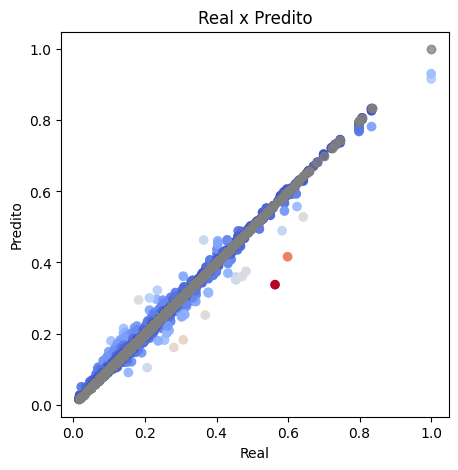

In [896]:
# plot chart of the real and predicted values
# paint the points in red according to size of the error, for the y_reg_pred

plt.figure(figsize=(5, 5))
plt.scatter(y_reg_test, y_reg_pred, c=np.abs(y_reg_test - y_reg_pred), cmap='coolwarm')
# paint the points from the y_reg_test in blue
plt.scatter(y_reg_test, y_reg_test, c='gray', alpha=0.5, cmap='coolwarm')
# color bar
#plt.colorbar()
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Real x Predito')
plt.show()

In [902]:
new_index_y_reg_test = y_reg_test.copy()
new_index_y_reg_test

array([0.21929825, 0.41447368, 0.14254386, ..., 0.11184211, 0.12280702,
       0.12938596])

In [903]:
y_reg_pred

array([0.21929825, 0.40909357, 0.1426462 , ..., 0.11184211, 0.1243019 ,
       0.13074561])

In [907]:
# reconstruct the dataframe with the real and predicted values
# first unite the y_reg_test and y_reg_pred and taking the index of y_reg_test as reference
# rescals the features to the original scale and add the real and predicted values and re-transfrom the timedelta columns to timedelta
df_reg_pred = pd.DataFrame(scaler_reg.inverse_transform(x_reg_test), columns=df_base_final_to_ml_reg.drop(columns=['apresentara_valor_creatinina']).columns)
df_reg_pred['real'] = y_scaler_reg.inverse_transform(new_index_y_reg_test.reshape(-1, 1))
df_reg_pred['predito'] = y_scaler_reg.inverse_transform(y_reg_pred.reshape(-1, 1))
for column in timedelta_columns:
    df_reg_pred[column] = pd.to_timedelta(df_reg_pred[column], unit='s')
df_reg_pred

,valor_creatinina,idade,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,varicao_valor_creatinina_1,varicao_valor_creatinina_2,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,...,varicao_valor_controle_1_Frequência Cardíaca,varicao_valor_controle_1_Frequência Respiratória,varicao_valor_controle_1_Pressão Arterial Diastólica,varicao_valor_controle_1_Pressão Arterial Sistólica,varicao_valor_controle_2_Frequência Cardíaca,varicao_valor_controle_2_Frequência Respiratória,varicao_valor_controle_2_Pressão Arterial Diastólica,varicao_valor_controle_2_Pressão Arterial Sistólica,real,predito
0,1.52,52.00,30 days 07:10:00,1 days 01:50:00,2 days 00:34:00,14.00,0.23,0.16,30 days 04:32:00,30 days 04:32:00,...,-0.03,-0.04,1.59,-0.02,0.01,0.10,-0.07,-0.13,1.28,1.28
1,1.89,81.00,14 days 09:56:00,1 days 03:18:00,2 days 00:56:00,13.00,-0.25,-0.16,13 days 17:04:00,13 days 17:04:00,...,0.00,0.00,-0.02,-0.02,0.00,0.04,0.03,0.00,2.17,2.15
2,1.25,41.00,32 days 22:25:00,0 days 21:57:00,1 days 23:08:00,14.00,-0.42,-0.43,32 days 10:18:00,32 days 10:18:00,...,0.29,1.47,-0.01,-0.90,-0.11,1.62,0.09,-0.90,0.93,0.93
3,1.18,54.00,19 days 22:43:00,0 days 23:19:00,1 days 13:29:00,8.00,-0.24,-0.36,19 days 18:11:00,19 days 18:11:00,...,-0.09,0.25,-0.04,-0.17,-0.08,0.19,-0.11,0.07,1.12,1.12
4,1.18,71.00,26 days 10:04:00,6 days 21:39:00,10 days 00:59:00,7.00,-0.18,-0.10,26 days 18:24:00,26 days 18:24:00,...,0.15,0.06,0.00,-0.14,0.17,0.00,0.11,-0.14,1.56,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0.84,74.00,7 days 23:18:00,2 days 02:36:00,7 days 22:33:00,3.00,-0.14,-0.09,8 days 04:25:00,8 days 04:25:00,...,0.03,-0.06,-0.14,-0.19,0.13,-0.16,0.02,-0.04,0.89,0.89
2513,1.77,53.00,26 days 05:46:00,1 days 00:57:00,1 days 08:18:00,10.00,0.45,0.58,25 days 09:02:00,25 days 09:02:00,...,0.29,0.33,-0.09,-0.19,-0.20,-0.13,0.42,0.38,1.66,1.66
2514,0.84,63.00,21 days 04:35:00,1 days 00:30:00,1 days 04:46:00,9.00,-0.09,0.15,20 days 11:18:00,20 days 11:18:00,...,-0.06,-0.13,0.00,0.08,-0.03,-0.17,-0.02,0.02,0.79,0.79
2515,1.11,65.00,33 days 20:46:00,1 days 00:23:00,4 days 10:57:00,7.00,-0.09,-0.07,33 days 22:13:00,33 days 22:13:00,...,0.00,0.17,-0.08,-0.04,0.00,-0.12,0.05,0.08,0.84,0.85


In [908]:
df_reg_pred = df_reg_pred[['varicao_valor_creatinina_1', 'valor_creatinina', 'real', 'predito']]
df_reg_pred.columns = ['anterior', 'atual', 'proximo', 'predito']

def revert_variacao(row):
    if row['anterior'] == 0:
        return row['atual']
    else:
        return ((row['atual'] - (row['anterior'] * 1e-8))/(1 + row['anterior']))

df_reg_pred['anterior'] = df_reg_pred.apply(revert_variacao, axis=1)
df_reg_pred

,anterior,atual,proximo,predito
0,1.24,1.52,1.28,1.28
1,2.52,1.89,2.17,2.15
2,2.17,1.25,0.93,0.93
3,1.56,1.18,1.12,1.12
4,1.44,1.18,1.56,1.48
...,...,...,...,...
2512,0.98,0.84,0.89,0.89
2513,1.22,1.77,1.66,1.66
2514,0.92,0.84,0.79,0.79
2515,1.22,1.11,0.84,0.85


In [909]:
def variation(row, target: str):
    return ((row[target] - row['anterior'])/(row['anterior'] + 1e-8))

def ira(row, target: str, threshold: float=0.3):
    return 1 if abs(((row[target] - row['anterior'])/(row['anterior'] + 1e-8))) >= threshold else 0

df_reg_pred['proxima_variacao'] = df_reg_pred.apply(lambda row: variation(row, 'proximo'), axis=1)
df_reg_pred['apresentara_ira'] = df_reg_pred.apply(lambda row: ira(row, 'proximo'), axis=1)
df_reg_pred['predito_ira'] = df_reg_pred.apply(lambda row: ira(row, 'predito'), axis=1)
df_reg_pred

,anterior,atual,proximo,predito,proxima_variacao,apresentara_ira,predito_ira
0,1.24,1.52,1.28,1.28,0.03,0,0
1,2.52,1.89,2.17,2.15,-0.14,0,0
2,2.17,1.25,0.93,0.93,-0.57,1,1
3,1.56,1.18,1.12,1.12,-0.28,0,0
4,1.44,1.18,1.56,1.48,0.08,0,0
...,...,...,...,...,...,...,...
2512,0.98,0.84,0.89,0.89,-0.09,0,0
2513,1.22,1.77,1.66,1.66,0.36,1,1
2514,0.92,0.84,0.79,0.79,-0.14,0,0
2515,1.22,1.11,0.84,0.85,-0.31,1,1


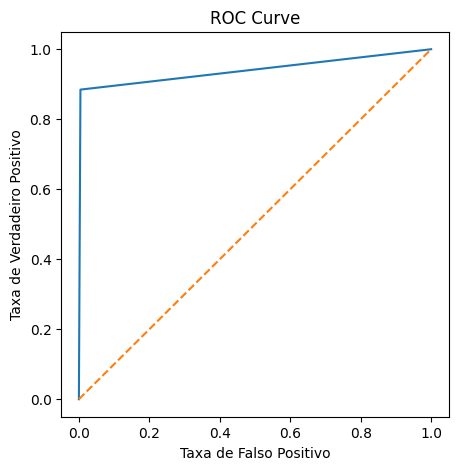

In [910]:
# plot the roc curve from apresentara_ira and predito_ira
plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(df_reg_pred['apresentara_ira'], df_reg_pred['predito_ira'])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('ROC Curve')
plt.show()

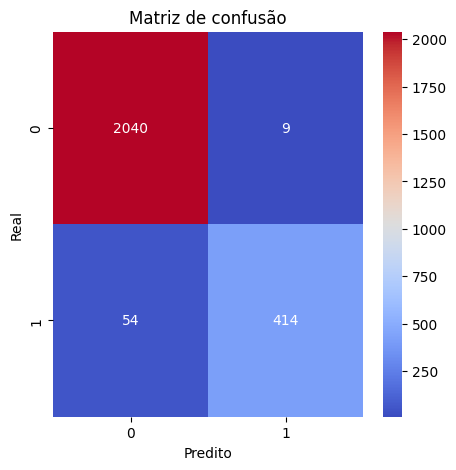

In [911]:
# plot confusion matrix apresentara_ira and predito_ira
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(df_reg_pred['apresentara_ira'], df_reg_pred['predito_ira']), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()


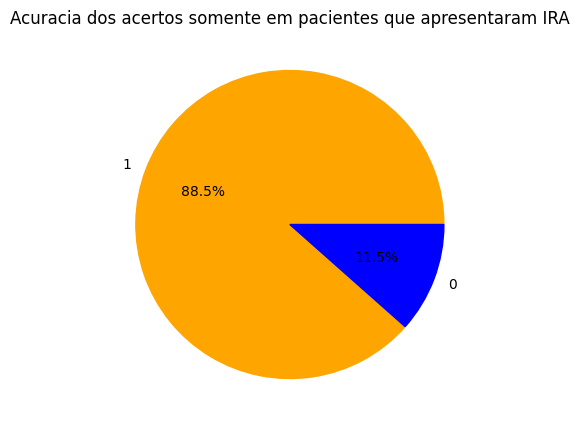

In [912]:
# plot pie chart where df_reg_pred['apresentara_ira'] == 1
plt.figure(figsize=(5, 5))
df_reg_pred[df_reg_pred['apresentara_ira'] == 1]['predito_ira'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.gca().patches[0].set_color('orange')
plt.gca().patches[1].set_color('blue')
plt.title('Acuracia dos acertos somente em pacientes que apresentaram IRA')
plt.ylabel('')
plt.show()


#### 6.2.2 Classificação

##### 6.2.2.1 Decision Tree

In [913]:
# Defina o modelo DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Defina os hiperparâmetros a serem otimizados
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# Defina a estratégia de validação cruzada estratificada
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Configure a pesquisa aleatória
random_search = RandomizedSearchCV(
    dt_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Número de iterações aleatórias
    scoring='recall',  # Ou outra métrica de avaliação desejada
    cv=stratified_cv,
    random_state=42
)

# Ajuste o modelo aos dados de treino
random_search.fit(x_classf_train, y_classf_train)

# Exiba os melhores hiperparâmetros encontrados
print("Best Hyperparameters:", random_search.best_params_)

# Avalie o modelo nos dados de teste
best_dt_classifier = random_search.best_estimator_
accuracy = random_search.best_estimator_.score(x_classf_val, y_classf_val)
print("Validation Set recall:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 12, 'splitter': 'best'}
Validation Set recall: 0.8159203980099502


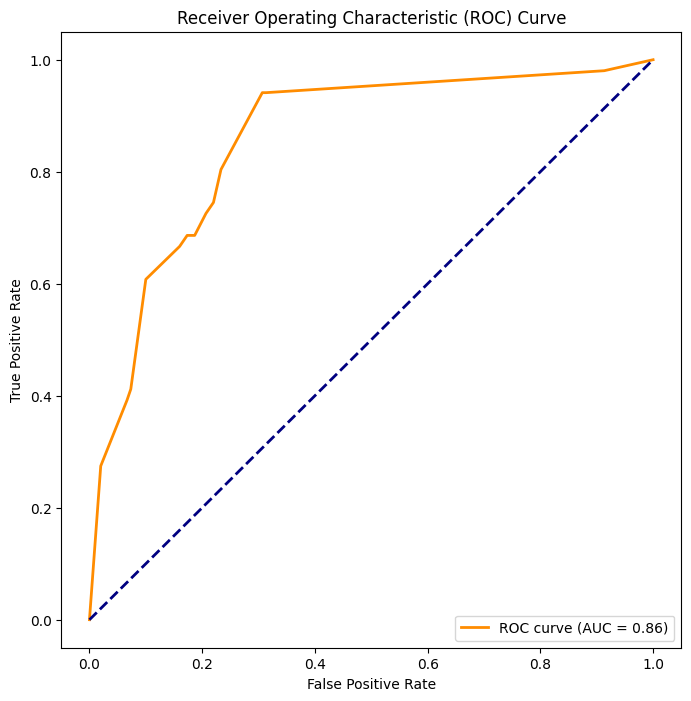

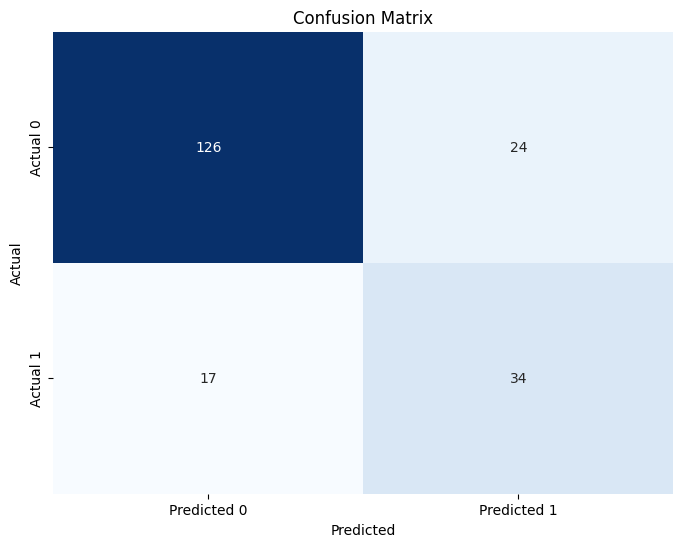

In [914]:
best_dt_classifier.fit(x_classf_train, y_classf_train)

# Faça previsões no conjunto de teste
y_prob = best_dt_classifier.predict_proba(x_classf_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_classf_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Faça previsões no conjunto de teste para a matriz de confusão
y_pred = best_dt_classifier.predict(x_classf_test)

# Crie a matriz de confusão
conf_matrix = confusion_matrix(y_classf_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

51
34
1   66.67
0   33.33
Name: equal, dtype: float64


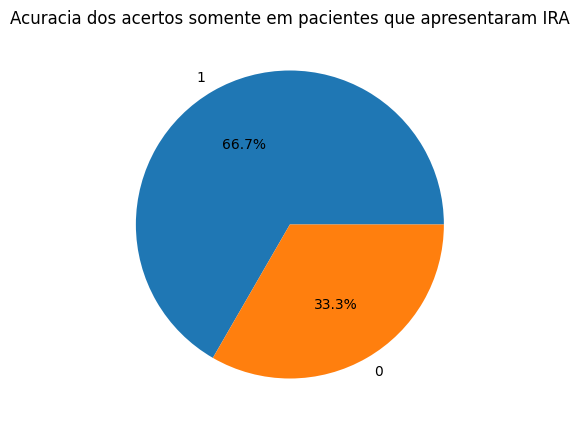

In [915]:
# unite y_classf_test and y_pred in a dataframe
# create a column to see if they are equal
# if they are equal then the column will be 1
# if they are different then the column will be 0
df_temp = pd.DataFrame()
df_temp['y_classf_test'] = y_classf_test
df_temp['y_pred'] = y_pred
df_temp = df_temp.loc[df_temp['y_classf_test'] == 1]
df_temp['equal'] = df_temp['y_classf_test'] == df_temp['y_pred']
df_temp['equal'] = df_temp['equal'].astype(int)
print(len(df_temp))
print(len(df_temp.loc[df_temp['equal']==1]))
print(df_temp['equal'].value_counts(normalize=True) * 100)
plt.figure(figsize=(5, 5))
# pie chart of the column equal
df_temp['equal'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.title('Acuracia dos acertos somente em pacientes que apresentaram IRA')
plt.show()

## 7. Avaliação da Performance de Modelos

## 8. Conclusão